In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

# https://pandas.pydata.org/docs/user_guide/merging.html

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

import statsmodels.api as sm
from statsmodels.formula.api import ols

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-13 12:34:30.395448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 12:34:30.608706: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-13 12:34:30.621472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-13 12:34:30.621493: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

2.10.0
2023-05-13 12:34:33
12:34:33
2.10.0
2023-05-13 12:34:33
12:34:33


In [2]:
metric_file_name_14 = './Train/Train14/metric_train_by_none.log'
metric_file_name_15 = './Train/Train15/metric_train_by_none.log'

In [3]:
df_14 = pd.read_csv(metric_file_name_14, sep=',', header=0)
df_15 = pd.read_csv(metric_file_name_15, sep=',', header=0)

In [4]:
df_14.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
0       192.168.0.170          16:33:51  16:33:5          191.46895   
1       192.168.0.170          16:34:00  16:34:0          162.54745   
2       192.168.0.170          16:34:11  16:34:1          111.51200   
3       192.168.0.170          16:34:20  16:34:2          112.08605   
4       192.168.0.170          16:34:30  16:34:3          180.54650   

   response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
0     119.914250              1           0.8        8.0       89.3   
1      99.688300              3           1.0        5.8       83.8   
2      77.076364              1           1.1        8.2       90.7   
3      80.622700              1           1.0        9.0       89.3   
4     104.015000              4           1.1        4.7       93.5   

   CPU0Total%  ...  [NUMA:0]Mapped  [NUMA:0]Anon  [NUMA:0]AnonH  \
0         9.0  ...         61808.0      724332.4            0.0   
1         8.3  ...         53424.8      726548.8            0.0   
2         9.1  ...         53854.0      723058.8            0.0   
3        10.4  ...         54846.8      722032.8            0.0   
4         6.1  ...         55873.6      722524.4            0.0   

   [NUMA:0]Inactive  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
0           46453.2         100.0               7.7               7.7   
1           35528.8         100.0               6.1               6.1   
2           31956.0         100.0               7.8               7.8   
3           32399.2         100.0               9.2               9.2   
4           33916.0         100.0               5.5               5.5   

   [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  
0                7.3           7.7            7.3  
1                5.9           6.1            6.0  
2                6.9           7.8            6.9  
3                8.7           9.2            8.8  
4                5.0           5.5            5.1  

[5 rows x 36 columns]

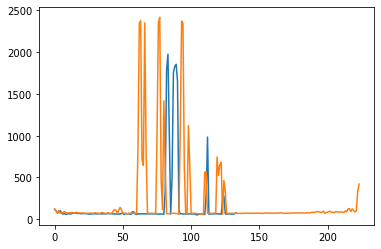

In [5]:
aa = pd.DataFrame(df_14['response_time'])
bb = pd.DataFrame(df_15['response_time'])

cc = pd.concat((aa, bb))

cc = pd.concat((aa, bb), keys=['t14', 't15'])

cc.head()

plt.plot(cc.loc['t14'])
plt.plot(cc.loc['t15'])
plt.show()

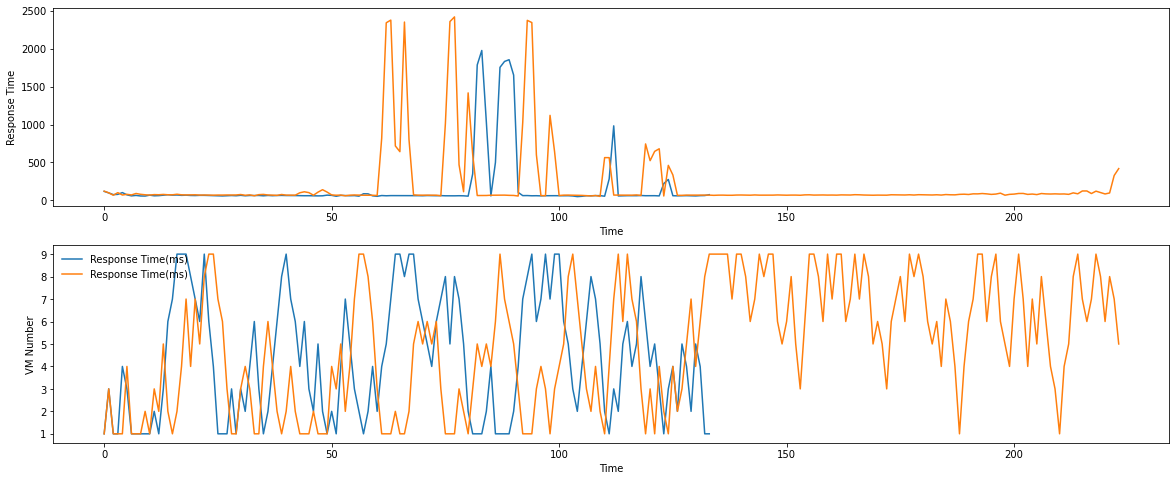

In [6]:
aa = pd.DataFrame(df_14[['response_time', 'worker_number']])
bb = pd.DataFrame(df_15[['response_time', 'worker_number']])

cc = pd.concat((aa, bb))

cc = pd.concat((aa, bb), keys=['t14', 't15'])

cc.head()

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(cc.loc['t14']['response_time'], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(cc.loc['t15']['response_time'], color = 'C1', label='Response Time(ms)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')

ax3.plot(cc.loc['t14']['worker_number'], color = 'C0', label='VM number')
ax3.plot(cc.loc['t15']['worker_number'], color = 'C1', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc=2, frameon=False)

plt.show()

In [7]:
cc = pd.concat((df_14, df_15), keys=['t14', 't15'])

cc.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
t14 0       192.168.0.170          16:33:51  16:33:5          191.46895   
    1       192.168.0.170          16:34:00  16:34:0          162.54745   
    2       192.168.0.170          16:34:11  16:34:1          111.51200   
    3       192.168.0.170          16:34:20  16:34:2          112.08605   
    4       192.168.0.170          16:34:30  16:34:3          180.54650   

       response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
t14 0     119.914250              1           0.8        8.0       89.3   
    1      99.688300              3           1.0        5.8       83.8   
    2      77.076364              1           1.1        8.2       90.7   
    3      80.622700              1           1.0        9.0       89.3   
    4     104.015000              4           1.1        4.7       93.5   

       CPU0Total%  ...  [NUMA:0]Mapped  [NUMA:0]Anon  [NUMA:0]AnonH  \
t14 0         9.0  ...         61808.0      724332.4            0.0   
    1         8.3  ...         53424.8      726548.8            0.0   
    2         9.1  ...         53854.0      723058.8            0.0   
    3        10.4  ...         54846.8      722032.8            0.0   
    4         6.1  ...         55873.6      722524.4            0.0   

       [NUMA:0]Inactive  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
t14 0           46453.2         100.0               7.7               7.7   
    1           35528.8         100.0               6.1               6.1   
    2           31956.0         100.0               7.8               7.8   
    3           32399.2         100.0               9.2               9.2   
    4           33916.0         100.0               5.5               5.5   

       [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  
t14 0                7.3           7.7            7.3  
    1                5.9           6.1            6.0  
    2                6.9           7.8            6.9  
    3                8.7           9.2            8.8  
    4                5.0           5.5            5.1  

[5 rows x 36 columns]

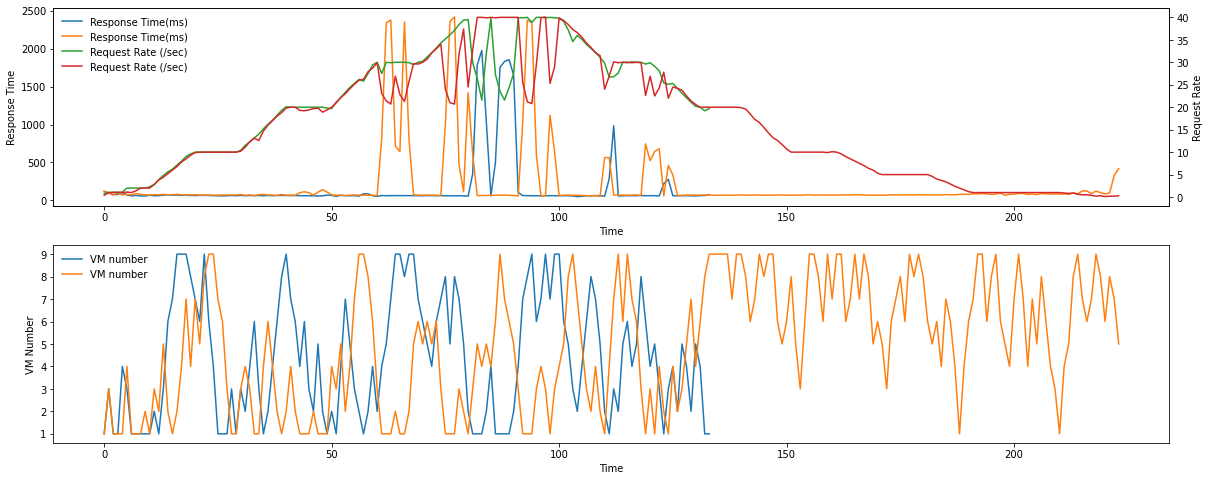

In [8]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(cc.loc['t14']['response_time'], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(cc.loc['t15']['response_time'], color = 'C1', label='Response Time(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(cc.loc['t14']['request_rate'], color = 'C2', label='Request Rate (/sec)')
l4 = ax2.plot(cc.loc['t15']['request_rate'], color = 'C3', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(cc.loc['t14']['worker_number'], color = 'C0', label='VM number')
ax3.plot(cc.loc['t15']['worker_number'], color = 'C1', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

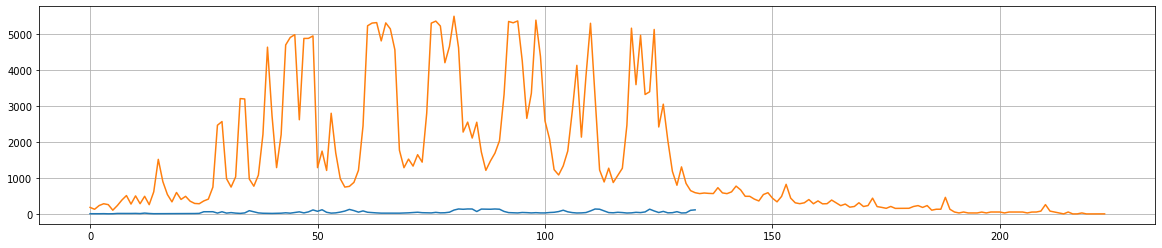

In [9]:
plt.figure(figsize=(20,4))
plt.plot(cc.loc['t14']['[TCPD]OutRequests'])
plt.plot(cc.loc['t15']['[TCPD]OutRequests'])
plt.grid()
plt.show()

In [10]:
cc.loc['t14']['worker_give_metrics'].unique()
cc.loc['t15']['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

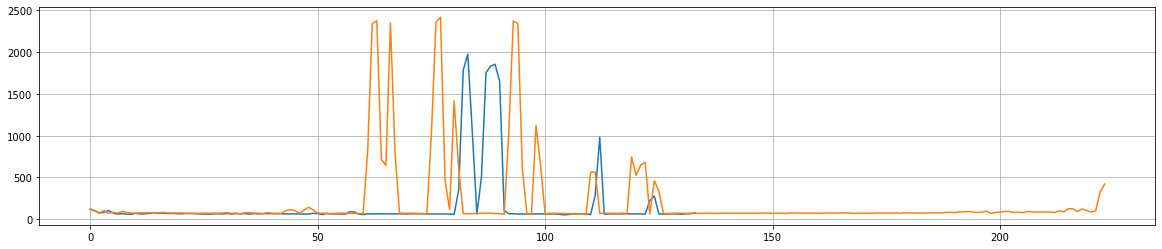

In [11]:
plt.figure(figsize=(20,4))
plt.plot(cc.loc['t14']['response_time'])
plt.plot(cc.loc['t15']['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

In [12]:
cc.loc['t14'].iloc[:, 0:7].describe()

response_time_p95  response_time  worker_number  request_rate
count         134.000000     134.000000     134.000000    134.000000
mean          331.543091     167.458011       4.328358     22.818657
std           879.242738     378.405910       2.669167     11.490906
min            69.585000      51.099014       1.000000      0.800000
25%            78.121988      62.170329       2.000000     13.400000
50%            84.178350      63.858418       4.000000     24.750000
75%           109.594950      67.570637       6.000000     30.000000
max          4907.699250    1974.086255       9.000000     40.000000

In [13]:
type(cc.index)
cc.index.get_loc_level('t14')
cc.index.get_level_values(1)
cc.index.levels
cc.index.levels[0]
len(cc.index.levels[0])

for l in cc.index.levels[0]:
    print(l)
    
for l in cc.index.levels[0]:
    print(cc.loc[l]['worker_number'].values.max())

t14
t15
9
9


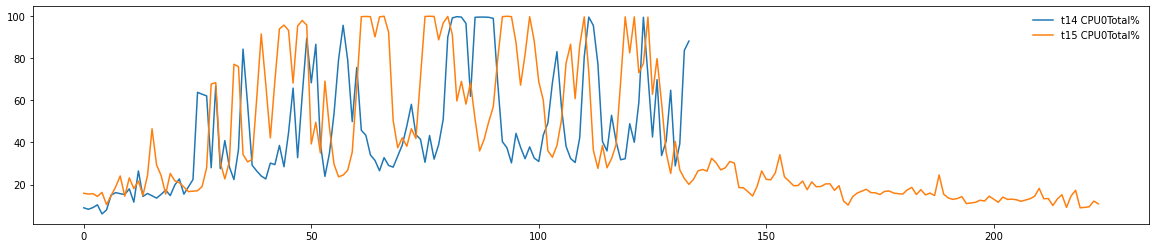

In [14]:
plt.figure(figsize=(20, 4))

for l in cc.index.levels[0]:
    for col_name in cc.loc[l].columns:
        if 'CPU0Total' in col_name:
            plt.plot(cc.loc[l][col_name], label = l + ' ' + col_name)

plt.legend(frameon=False)
plt.show()

In [15]:
for l in cc.index.levels[0]:
    cc.loc[l].iloc[:, 7:10].describe()

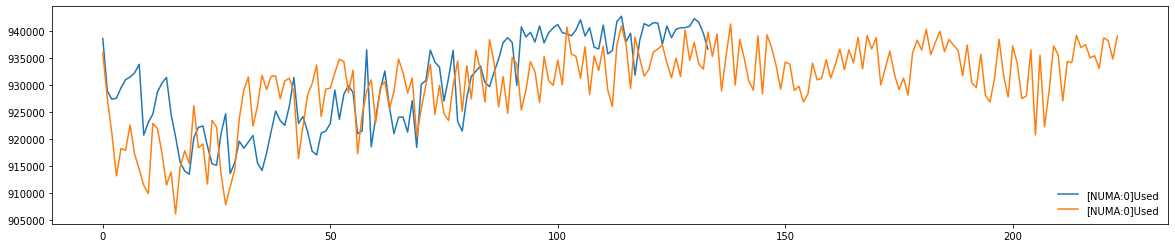

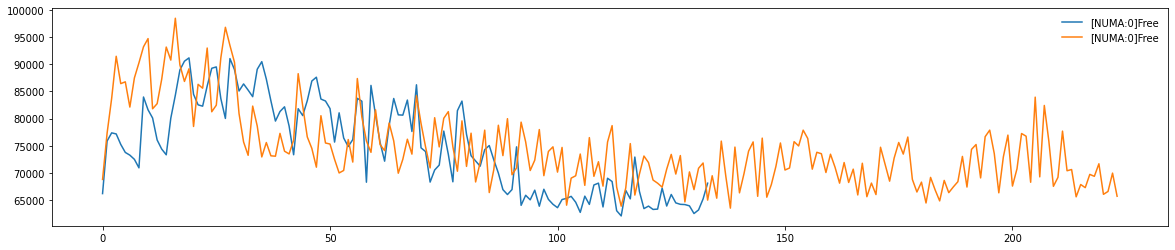

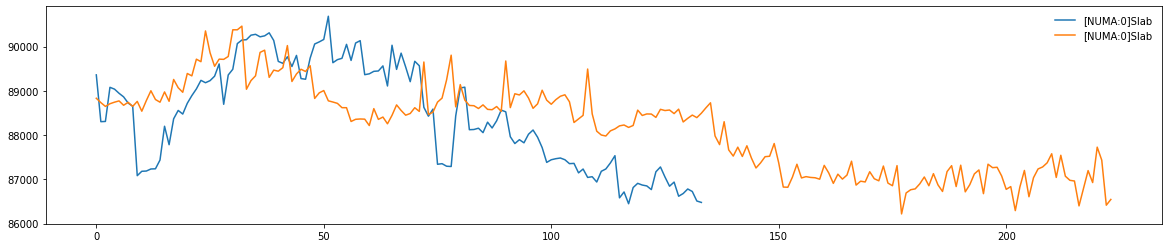

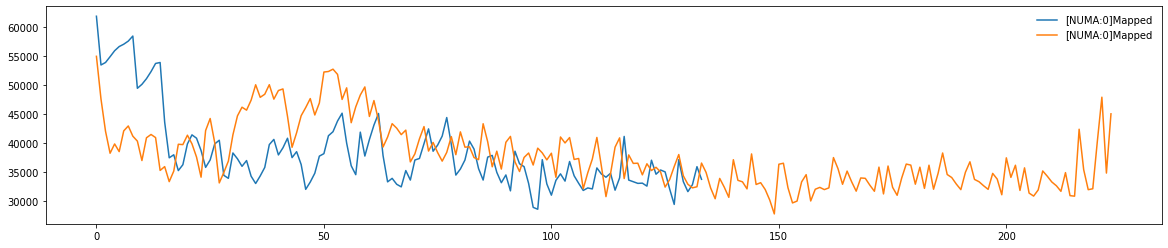

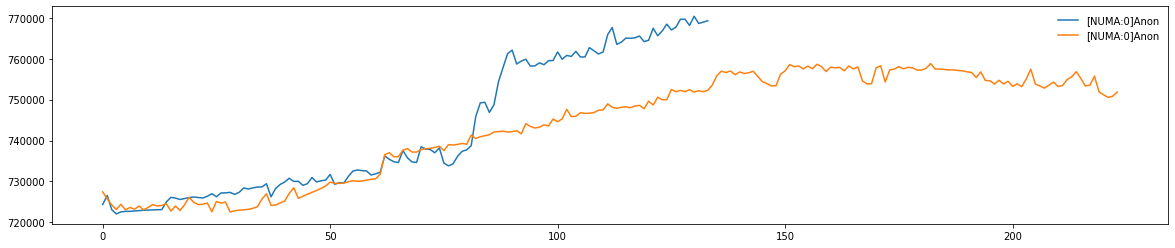

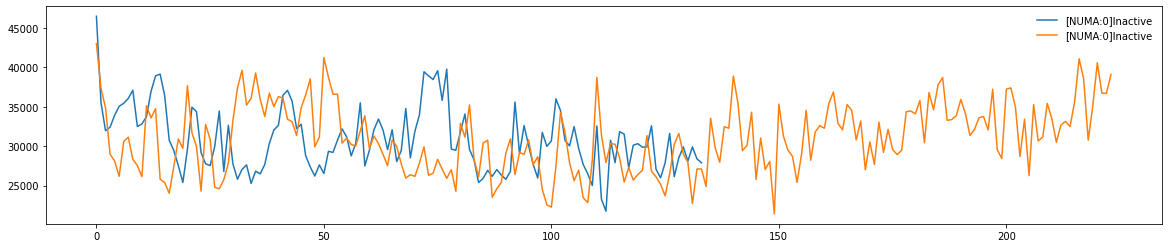

In [16]:
for col_name in cc.columns:
    if 'NUMA' in col_name:
        if cc[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            for l in cc.index.levels[0]:
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(cc.loc[l][col_name], label = col_name)
                plt.legend(frameon=False)
            plt.show()

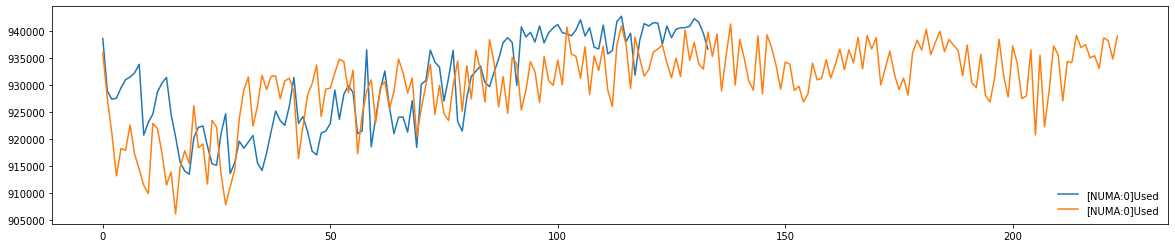

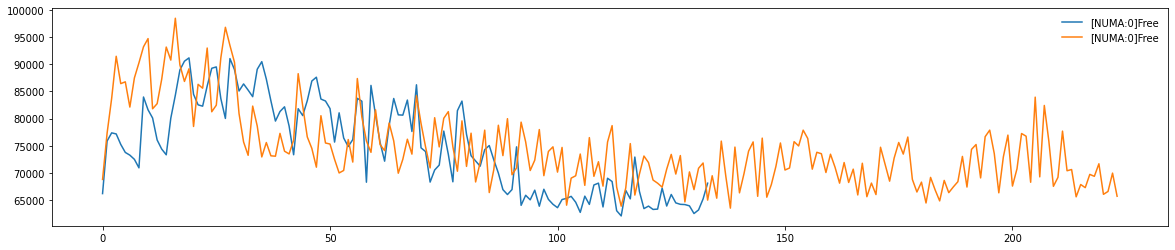

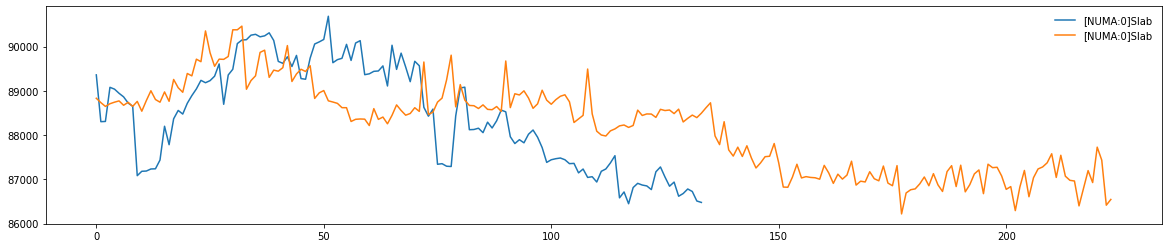

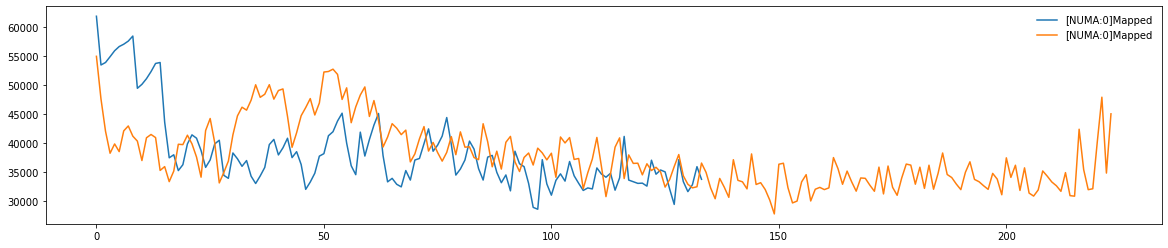

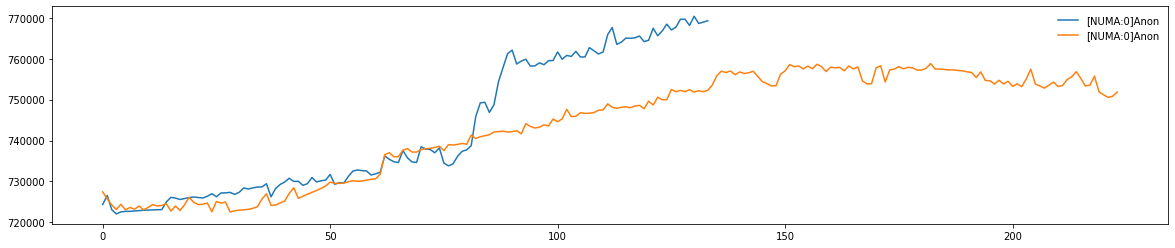

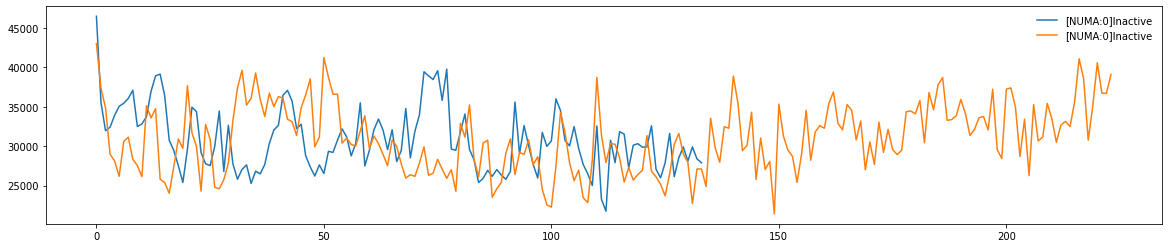

In [17]:
for col_name in cc.columns:
    if 'NUMA' in col_name:
        if cc[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            for l in cc.index.levels[0]:
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(cc.loc[l][col_name], label = col_name)
                plt.legend(frameon=False)
            plt.show()

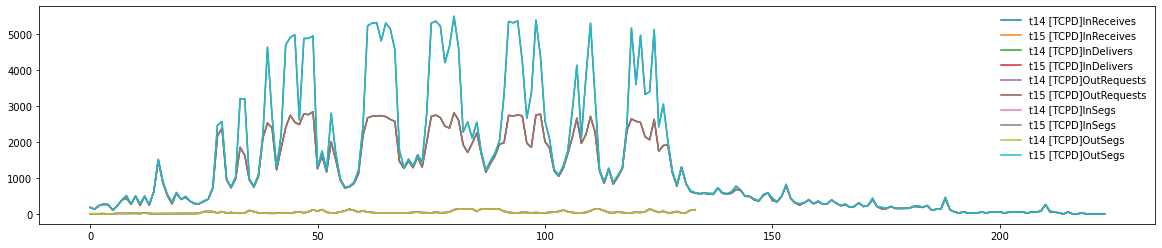

In [18]:
plt.figure(figsize=(20, 4))

for col_name in cc.columns:
    for l in cc.index.levels[0]:
        if 'TCP' in col_name:
            if cc.loc[l][col_name].describe()[2] > 0:
                plt.plot(cc.loc[l][col_name], label = l + ' ' + col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [19]:
mf = cc.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
t14 0       192.168.0.170          16:33:51  16:33:5          191.46895   
    1       192.168.0.170          16:34:00  16:34:0          162.54745   
    2       192.168.0.170          16:34:11  16:34:1          111.51200   
    3       192.168.0.170          16:34:20  16:34:2          112.08605   
    4       192.168.0.170          16:34:30  16:34:3          180.54650   

       response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
t14 0     119.914250              1           0.8        8.0       89.3   
    1      99.688300              3           1.0        5.8       83.8   
    2      77.076364              1           1.1        8.2       90.7   
    3      80.622700              1           1.0        9.0       89.3   
    4     104.015000              4           1.1        4.7       93.5   

       CPU0Total%  ...  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
t14 0         9.0  ...         100.0               7.7               7.7   
    1         8.3  ...         100.0               6.1               6.1   
    2         9.1  ...         100.0               7.8               7.8   
    3        10.4  ...         100.0               9.2               9.2   
    4         6.1  ...         100.0               5.5               5.5   

       [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  actual_vm_number_is  \
t14 0                7.3           7.7            7.3                    1   
    1                5.9           6.1            6.0                    3   
    2                6.9           7.8            6.9                    1   
    3                8.7           9.2            8.8                    1   
    4                5.0           5.5            5.1                    4   

       actual_vm_number_was  actual_vm_number_will  delta_vm  
t14 0                   NaN                    3.0       2.0  
    1                   1.0                    1.0      -2.0  
    2                   3.0                    1.0       0.0  
    3                   1.0                    4.0       3.0  
    4                   1.0                    3.0      -1.0  

[5 rows x 40 columns]

In [20]:
mf['delta_vm'].unique()

array([ 2., -2.,  0.,  3., -1.,  1., -3., nan])

In [21]:
# ezt kell összeillesztenem a másik adatbázissal a time alapján

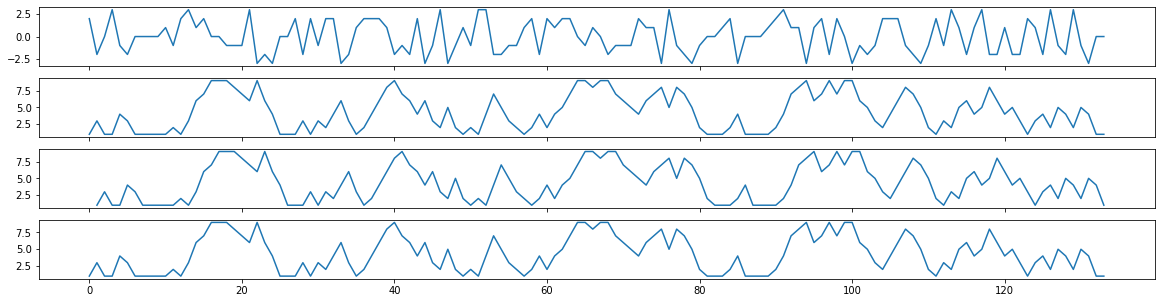

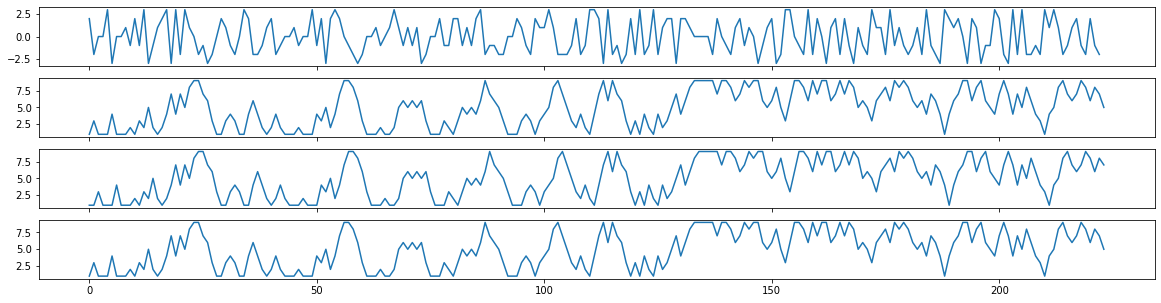

In [22]:
for l in cc.index.levels[0]:

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

    ax1.plot(mf.loc[l]['delta_vm'])
    ax2.plot(mf.loc[l]['actual_vm_number_is'])
    ax3.plot(mf.loc[l]['actual_vm_number_was'])
    ax4.plot(mf.loc[l]['worker_number'])
    plt.show()


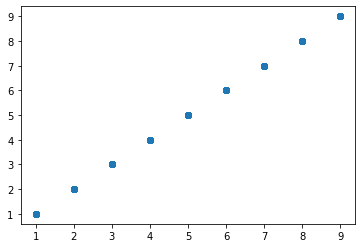

In [23]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

plt.scatter(mf['worker_number'], mf['actual_vm_number_is'])
plt.show()

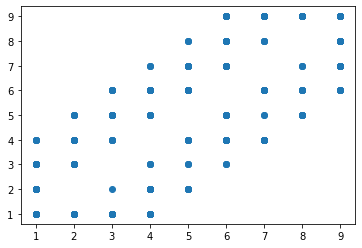

In [24]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_was'])
plt.show()

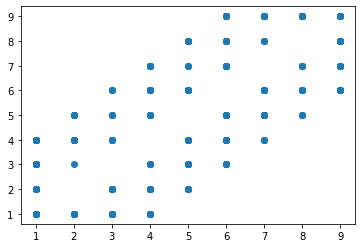

In [25]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_will'])

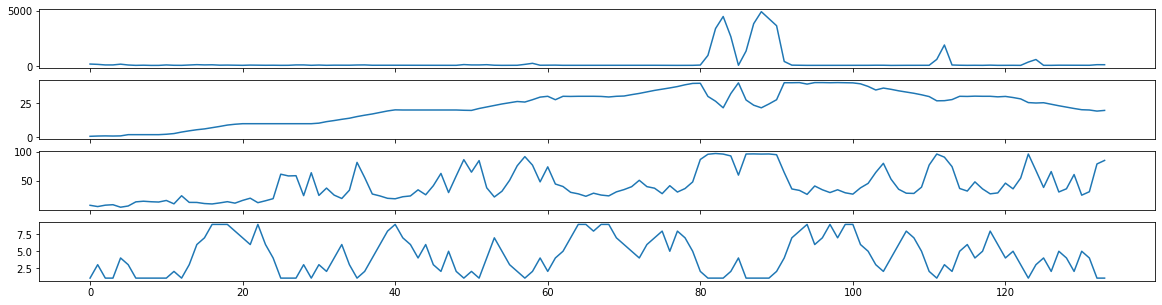

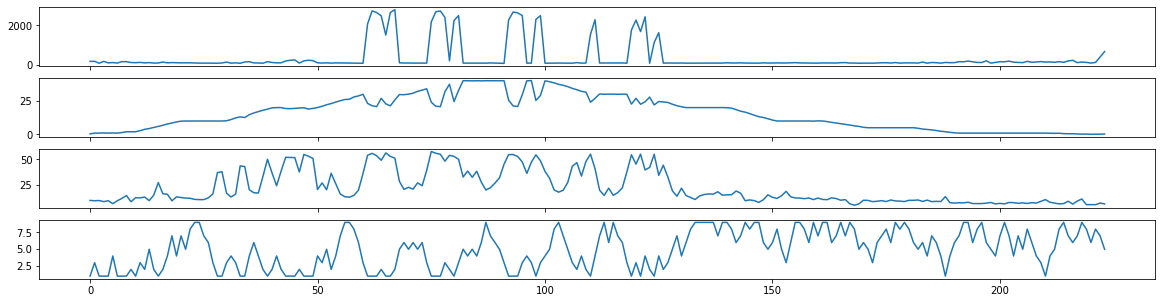

In [26]:
for l in cc.index.levels[0]:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

    ax1.plot(cc.loc[l]['response_time_p95'])
    ax2.plot(cc.loc[l]['request_rate'])
    ax3.plot(cc.loc[l]['CPU0User%'])
    ax4.plot(cc.loc[l]['worker_number'])
    plt.show()

In [27]:
# Kivi vagyok, hogy ha egy hierach df-ből származtatok az is hierarch lesz-e?

In [28]:
ff = mf[['time', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_is', 'actual_vm_number_will', 'delta_vm']].copy()

In [29]:
ff.head()

time  response_time  worker_number  request_rate  CPU0User%  \
t14 0  16:33:5     119.914250              1           0.8        8.0   
    1  16:34:0      99.688300              3           1.0        5.8   
    2  16:34:1      77.076364              1           1.1        8.2   
    3  16:34:2      80.622700              1           1.0        9.0   
    4  16:34:3     104.015000              4           1.1        4.7   

       actual_vm_number_is  actual_vm_number_will  delta_vm  
t14 0                    1                    3.0       2.0  
    1                    3                    1.0      -2.0  
    2                    1                    1.0       0.0  
    3                    1                    4.0       3.0  
    4                    4                    3.0      -1.0

In [30]:
f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

In [31]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

# metrics[i]=numpy.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

In [32]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [33]:
f1 = ff.copy()
f1['CPU0User%Next'] = f1['CPU0User%'].shift(-1)
f1['CPU0User%Prev'] = f1['CPU0User%'].shift(+1)
f1.head()

time  response_time  worker_number  request_rate  CPU0User%  \
t14 0  16:33:5     119.914250              1           0.8        8.0   
    1  16:34:0      99.688300              3           1.0        5.8   
    2  16:34:1      77.076364              1           1.1        8.2   
    3  16:34:2      80.622700              1           1.0        9.0   
    4  16:34:3     104.015000              4           1.1        4.7   

       actual_vm_number_is  actual_vm_number_will  delta_vm  CPU0User%Next  \
t14 0                    1                    3.0       2.0            5.8   
    1                    3                    1.0      -2.0            8.2   
    2                    1                    1.0       0.0            9.0   
    3                    1                    4.0       3.0            4.7   
    4                    4                    3.0      -1.0            6.8   

       CPU0User%Prev  
t14 0            NaN  
    1            8.0  
    2            5.8  
    3            8.2  
    4            9.0

In [34]:
pd.set_option('mode.chained_assignment','warn')
pd.set_option('mode.chained_assignment', None)

In [35]:
f2 = ff.copy()

f2['CPU0User%']
f2.loc[:,('CPU0User%')]

f2.loc['t14', ('CPU0User%')]
f2.loc['t15', ('CPU0User%')]

f2.loc['t14', ('CPU0User%')].shift(-1)
f2.loc['t14', ('CPU0User%')].shift(+1)

# Ezt az apply cuccot elteszem tartalékosba még jól jöhet
f2.loc['t14', ('CPU0User%')].apply(lambda x: x+1)


# Constans
f2.loc['t14', ('Faszom')] = 10
f2.loc['t15', ('Faszom')] = 20
f2.head()


# Mindkettő kell
f2.loc['t14', ('CPU0User%Next')] = f2.loc['t14', ('CPU0User%')].shift(-1)
f2.loc['t14']['CPU0User%Next'] = f2.loc['t14', ('CPU0User%')].shift(-1)

f2.loc['t14', ('CPU0User%Prev')] = f2.loc['t14', ('CPU0User%')].shift(+1)
f2.loc['t14']['CPU0User%Prev'] = f2.loc['t14', ('CPU0User%')].shift(+1)


# Mindkettő kell
f2.loc['t15', ('CPU0User%Next')] = f2.loc['t15', ('CPU0User%')].shift(-1)
f2.loc['t15']['CPU0User%Next'] = f2.loc['t15', ('CPU0User%')].shift(-1)

f2.loc['t15', ('CPU0User%Prev')] = f2.loc['t15', ('CPU0User%')].shift(+1)
f2.loc['t15']['CPU0User%Prev'] = f2.loc['t15', ('CPU0User%')].shift(+1)

f2[132:].head()

time  response_time  worker_number  request_rate  CPU0User%  \
t14 132  16:55:5      65.098656              1          19.2       79.1   
    133  16:56:0      76.242970              1          19.7       85.2   
t15 0    20:07:3     122.845000              1           0.4        9.8   
    1    20:07:4     100.906500              3           1.0        9.5   
    2    20:07:5      69.350800              1           1.0        9.7   

         actual_vm_number_is  actual_vm_number_will  delta_vm  Faszom  \
t14 132                    1                    1.0       0.0    10.0   
    133                    1                    1.0       0.0    10.0   
t15 0                      1                    3.0       2.0    20.0   
    1                      3                    1.0      -2.0    20.0   
    2                      1                    1.0       0.0    20.0   

         CPU0User%Next  CPU0User%Prev  
t14 132           85.2           31.3  
    133            NaN           79.1  
t15 0              9.5            NaN  
    1              9.7            9.8  
    2              8.6            9.5

In [36]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [37]:
f2 = f2.dropna()
f2[130:].head()

time  response_time  worker_number  request_rate  CPU0User%  \
t14 131  16:55:4      63.868745              4          20.0       31.3   
    132  16:55:5      65.098656              1          19.2       79.1   
t15 1    20:07:4     100.906500              3           1.0        9.5   
    2    20:07:5      69.350800              1           1.0        9.7   
    3    20:08:0     103.225818              1           1.1        8.6   

         actual_vm_number_is  actual_vm_number_will  delta_vm  Faszom  \
t14 131                    4                    1.0      -3.0    10.0   
    132                    1                    1.0       0.0    10.0   
t15 1                      3                    1.0      -2.0    20.0   
    2                      1                    1.0       0.0    20.0   
    3                      1                    1.0       0.0    20.0   

         CPU0User%Next  CPU0User%Prev  
t14 131           79.1           25.4  
    132           85.2           31.3  
t15 1              9.7            9.8  
    2              8.6            9.5  
    3              9.5            9.7

In [38]:
f2.tail()

time  response_time  worker_number  request_rate  CPU0User%  \
t15 218  20:43:5       122.8730              9           0.2       11.2   
    219  20:44:0       103.9140              8           0.3        5.6   
    220  20:44:5        86.0120              6           0.1        5.7   
    221  20:59:3        99.2095              8           0.2        5.6   
    222  20:59:4       328.9600              7           0.2        7.2   

         actual_vm_number_is  actual_vm_number_will  delta_vm  Faszom  \
t15 218                    9                    8.0      -1.0    20.0   
    219                    8                    6.0      -2.0    20.0   
    220                    6                    8.0       2.0    20.0   
    221                    8                    7.0      -1.0    20.0   
    222                    7                    5.0      -2.0    20.0   

         CPU0User%Next  CPU0User%Prev  
t15 218            5.6            9.2  
    219            5.7           11.2  
    220            5.6            5.6  
    221            7.2            5.7  
    222            6.4            5.6

In [39]:
# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f2[ (f2['delta_vm'] == 0) ].index
f2.drop(indexAge , inplace=True)

f2[111:].head()

time  response_time  worker_number  request_rate  CPU0User%  \
t14 129  16:55:2      62.071564              2          21.1       60.9   
    130  16:55:3      60.072178              5          20.2       25.4   
    131  16:55:4      63.868745              4          20.0       31.3   
t15 1    20:07:4     100.906500              3           1.0        9.5   
    4    20:08:1      72.214400              1           1.0        9.5   

         actual_vm_number_is  actual_vm_number_will  delta_vm  Faszom  \
t14 129                    2                    5.0       3.0    10.0   
    130                    5                    4.0      -1.0    10.0   
    131                    4                    1.0      -3.0    10.0   
t15 1                      3                    1.0      -2.0    20.0   
    4                      1                    4.0       3.0    20.0   

         CPU0User%Next  CPU0User%Prev  
t14 129           25.4           36.4  
    130           31.3           60.9  
    131           79.1           25.4  
t15 1              9.7            9.8  
    4              6.6            8.6

In [40]:
# Van-e bárhol NaN

f2['CPU0User%'].isnull().values.any()

for _ in f2.columns:
    print(f2[_].isnull().values.any())

# (3) Check for NaN under an entire DataFrame

print(f2.isnull().values.any())

# (4) Count the NaN under an entire DataFrame

print(f2.isnull().sum())

False
False
False
False
False
False
False
False
False
False
False
False
time                     0
response_time            0
worker_number            0
request_rate             0
CPU0User%                0
actual_vm_number_is      0
actual_vm_number_will    0
delta_vm                 0
Faszom                   0
CPU0User%Next            0
CPU0User%Prev            0
dtype: int64


In [41]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [42]:
for l in f3.index.levels[0]:
    with np.printoptions(precision=2, suppress=True):
        print(f3.loc[l]['cpu_term1'].min(), ' | ', f3.loc[l]['cpu_term1'].max())
        print(f3.loc[l]['cpu_term2'].min(), ' | ', f3.loc[l]['cpu_term2'].max())
        print()    

2.25  |  239.6
-179.7  |  64.13333333333334

2.375  |  141.89999999999998
-94.6  |  41.400000000000006



In [43]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [44]:
# Ez a jó

# A jelenlegi a lapján 'CPU0USer' becsüljük a következő értéket 'CPU0User%Next'

f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

# --

lrs = []
pred_cpus = []

for l in f3.index.levels[0]:
    
    _cpu_term = f3.loc[l][['cpu_term1', 'cpu_term2']]          # jelenlegiekből összeállított term

    _cpu_next = f3.loc[l]['CPU0User%Next']                     # a következő mérés értéke
    
    print(_cpu_term.shape, _cpu_next.shape)
    
    lr = LinearRegression(fit_intercept=True)
    rr = lr.fit(_cpu_term, _cpu_next)
    rr.score(_cpu_term, _cpu_next)

    lrs.append(rr)
    
    pred_cpu = rr.predict(_cpu_term)
    
    pred_cpus.append(pred_cpu)


(114, 2) (114,)
(194, 2) (194,)


In [45]:
# Kivi vok hogy az igy elrakott modellek különbözőek-e vagy a referenciát tárolja le?

print(lrs[0].coef_)
print(lrs[1].coef_)

[0.81781785 0.39969183]
[0.87016971 0.58266153]


In [46]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

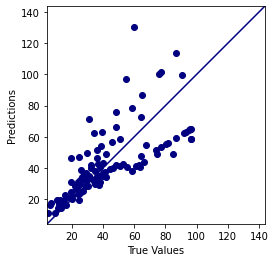

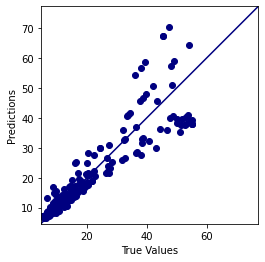

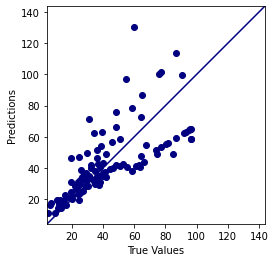

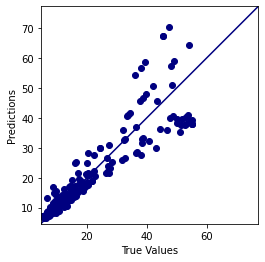

In [47]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

for i, l in enumerate(f3.index.levels[0]):
    plot_true_vs_pred(f3.loc[l]['CPU0User%'], pred_cpus[i])

for p, l in zip(pred_cpus, f3.index.levels[0]):
    plot_true_vs_pred(f3.loc[l]['CPU0User%'], p)


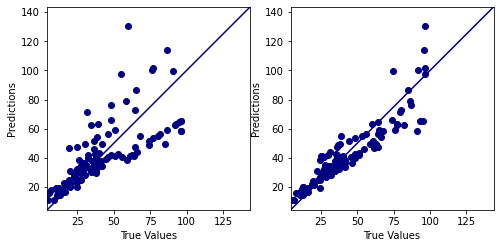

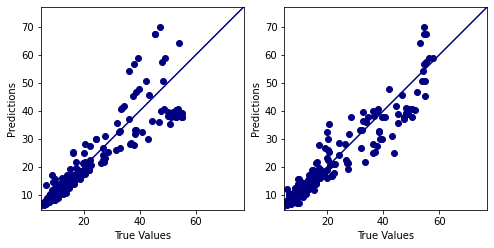

In [48]:
def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

for pred_cpu, l in zip(pred_cpus, f3.index.levels[0]):
    plot_true_vs_pred_two(f3.loc[l]['CPU0User%'], pred_cpu, f3.loc[l]['CPU0User%Next'], pred_cpu)


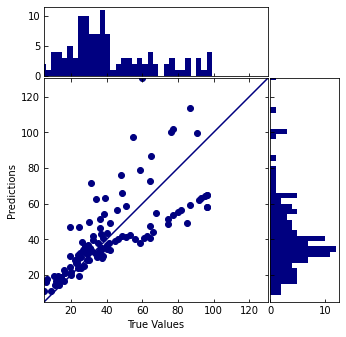

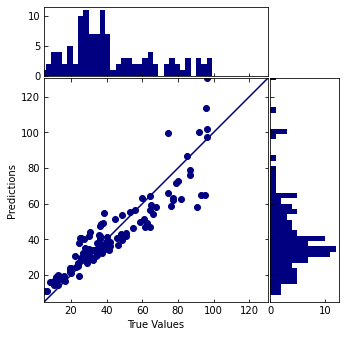

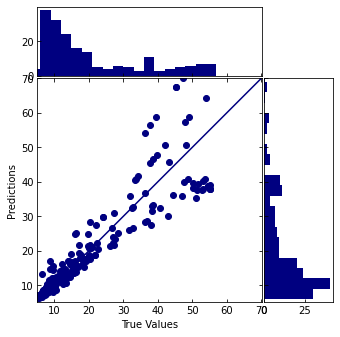

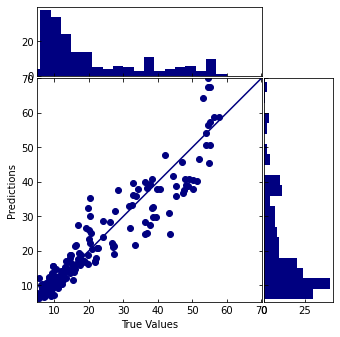

In [49]:
def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()

for pred_cpu, l in zip(pred_cpus, f3.index.levels[0]):
    
    plot_true_vs_pred_hist(f3.loc[l]['CPU0User%'].values, pred_cpu)

    plot_true_vs_pred_hist(f3.loc[l]['CPU0User%Next'].values, pred_cpu)

xaaaaaaaaaaa

In [50]:
import scipy.stats as stats

def calc_true_pred_stats(true, pred, show=True):
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    if show == True:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if show == True:
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))
    
    return {'slope': slope, 'intercept': intercept, 'r2': r2, 'r': r, 'mse': mse}

vaaaaaaaaa

In [51]:
import scipy.stats as stats

def plot_true_vs_pred_hist_conf(true, pred, binwidth=3.00):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    # binwidth = 3.00
    binwidth = binwidth
    
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    # ax_histx.axis('off')
    # ax_histy.axis('off')
    
    # ---------------------------------------------------------------
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    print('r2 {:.2f}'.format(r2))
    print('r  {:.2f}'.format(r))
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    print('mse {:.2f}'.format(mse))
    
    # to plot the adjusted model
    true_line = np.linspace(np.min(true), np.max(true), 100)
    true_line = np.linspace(min(np.min(true),np.min(pred)), max(np.max(true),np.max(pred)), 100)
    
    pred_line = np.polyval([slope, intercept], true_line)
    
    # confidence interval
    ci = t * std_error * (1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5
    # predicting interval
    pi = t * std_error * (1 + 1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5  

    ax_scatter.plot(true_line, pred_line)
    ax_scatter.fill_between(true_line, pred_line + pi, pred_line - pi, color = 'lightcyan', label = '95% prediction interval')
    ax_scatter.fill_between(true_line, pred_line + ci, pred_line - ci, color = 'skyblue', label = '95% confidence interval')

    # the scatter plot (again):
    ax_scatter.scatter(true, pred)
    
    # rounding and position must be changed for each case and preference
    a = str(np.round(intercept))
    b = str(np.round(slope,2))
    r2s = str(np.round(r2,2))
    MSEs = str(np.round(mse))
    
    # ax_scatter.text(20, 64, 'y = ' + a + ' + ' + b + ' x')
    # ax_scatter.text(20, 60, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
    
    # ax_scatter.legend(fontsize=12)
    ax_scatter.legend(frameon=False)
    
    
    # a belső (pici) 95% Confidence region
    # a külső (nagy) 95% Confidence interval
    
    plt.show()


slope 0.66 int 15.16
r2 0.52
r  0.72
mse 299.21


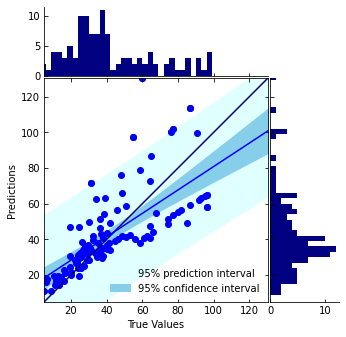

slope 0.83 int 7.20
r2 0.83
r  0.91
mse 96.52


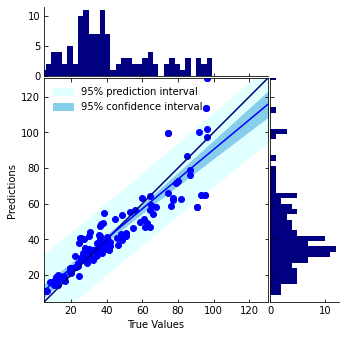

slope 0.86 int 3.00
r2 0.81
r  0.90
mse 43.87


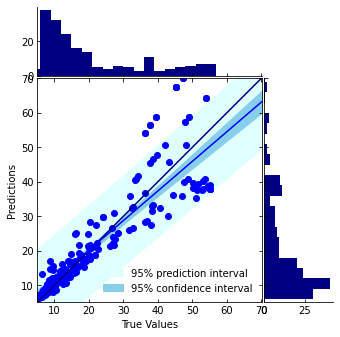

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


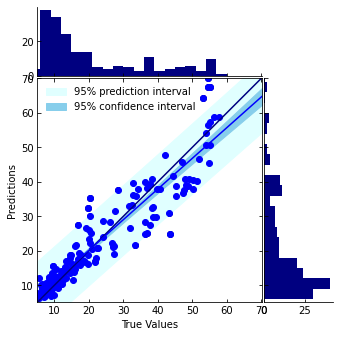

In [52]:
for pred_cpu, l in zip(pred_cpus, f3.index.levels[0]):
    
    plot_true_vs_pred_hist_conf(f3.loc[l]['CPU0User%'].values, pred_cpu)

    plot_true_vs_pred_hist_conf(f3.loc[l]['CPU0User%Next'].values, pred_cpu)

In [53]:
# Egy gyors ellenörzés -> hogy vátozna, ha a 'k' (delta_vm) számát én állítanám be

In [54]:
# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [55]:
lrs

[LinearRegression(), LinearRegression()]

In [56]:
_cpu_usage = 90
_actual_vm = 2
_delta_vm = 10

_t1 = _cpu_usage * _actual_vm/(_actual_vm + _delta_vm)
_t2 = _cpu_usage * _delta_vm/(_actual_vm + _delta_vm)

_x = np.array([[_t1, _t2]])

print(_x.shape)
print(_x)

for it, rr in zip(f3.index.levels[0], lrs):
# for rr in lrs:
    _pred = rr.predict(_x)
    print(_pred, it)

# Jó, a model azt mondja, hogy ha 1 darab VM-t hozzáadok akkor csökkenni fog a CPU Usage

(1, 2)
[[15. 75.]]
[48.69942132] t14
[58.61072306] t15


/home/ubuntu/notebook/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ubuntu/notebook/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


naaaaaaa

In [59]:
from sklearn.linear_model import LinearRegression

def create_model_for_metric(columnname: str, short=False, binwidth=3.0):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    for l in f1.index.levels[0]:
        f1.loc[l, (__next_name)] = f1.loc[l, (columnname)].shift(-1)
        f1.loc[l][__next_name] = f1.loc[l, (columnname)].shift(-1)
        
        f1.loc[l, (__prev_name)] = f1.loc[l, (columnname)].shift(+1)
        f1.loc[l][__prev_name] = f1.loc[l, (columnname)].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    lrs = []
    pred_cpus = []
    
    for l in f1.index.levels[0]:
        
        print(__metric_term.loc[l].shape, __metric_next.loc[l].shape)
        
        lr = LinearRegression(fit_intercept=True)
        rr = lr.fit(__metric_term.loc[l], __metric_next.loc[l])
        rr.score(__metric_term.loc[l], __metric_next.loc[l])
        
        lrs.append(rr)
        
        __fit_score = rr.score(__metric_term.loc[l], __metric_next.loc[l])
    
        __fit_coef_ = rr.coef_
        
        __fit_intercept_ = rr.intercept_
        
        __pred_metric = rr.predict(__metric_term.loc[l])
        
        if short == True:
            print('score  =', __fit_score)
            print('coef   =', __fit_coef_)
            print('intcpt =', __fit_intercept_)

            print()
    
        # Uristen geci bazmeg, hogy én mekkora fasz vagyok
    #    plot_true_vs_pred(f1[columnname].values, __pred_metric)
        # Ez itt a before vs pred_next
        # Nem pedig a next vs pred_next

    #    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
        # ugyan ez
        # plot_true_vs_pred(__metric_next, __pred_metric)

    # A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
        if short == False:
            plot_true_vs_pred_two(f1.loc[l][columnname].values, __pred_metric, f1.loc[l][__next_name].values, __pred_metric)
        
        plot_true_vs_pred_hist_conf(f1.loc[l][__next_name].values, __pred_metric, binwidth)


In [60]:
# Ezek itt a delta_metric_pred, delta_metric_true pred plottok

# Az lr álltal a metrika pred after scaling vs metrika true after scaling értékeket vetik össze.

# True vs Pred

# ------------

# Viszont a score, coef, intercpt értékek a modellből vannak számolva

# Viszont a slope, r2, r, mse viszot a becslés jóságát nézik (pred vs true)

(114, 2) (114,)
score  = 0.8320595206309692
coef   = [0.81781785 0.39969183]
intcpt = 6.455266131865379

slope 0.83 int 7.20
r2 0.83
r  0.91
mse 96.52


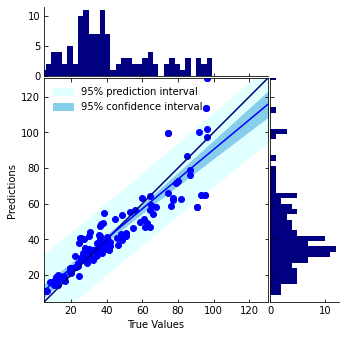

(194, 2) (194,)
score  = 0.8891952695428373
coef   = [0.87016971 0.58266153]
intcpt = 1.8585627908563147

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


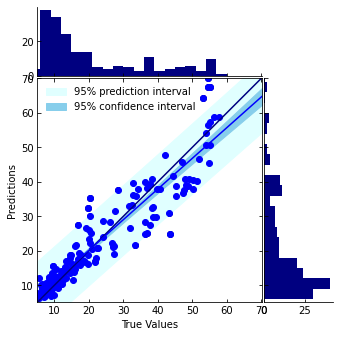

In [61]:
create_model_for_metric('CPU0User%', short=True)

(114, 2) (114,)
score  = 0.8320595206309692
coef   = [0.81781785 0.39969183]
intcpt = 6.455266131865379

slope 0.83 int 7.20
r2 0.83
r  0.91
mse 96.52


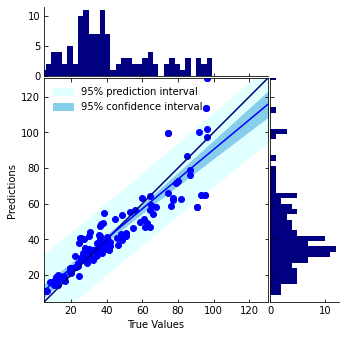

(194, 2) (194,)
score  = 0.8891952695428373
coef   = [0.87016971 0.58266153]
intcpt = 1.8585627908563147

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


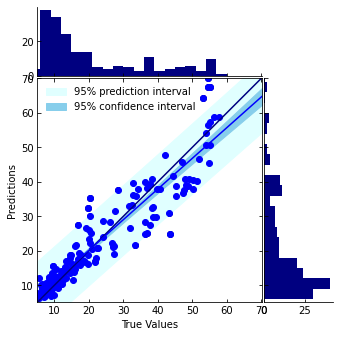

In [62]:
create_model_for_metric('CPU0User%', short=True)

(114, 2) (114,)


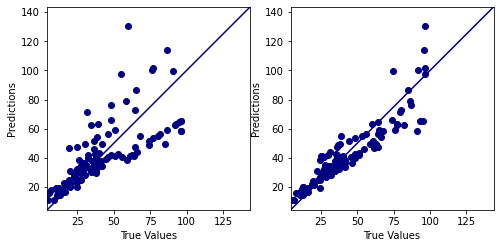

slope 0.83 int 7.20
r2 0.83
r  0.91
mse 96.52


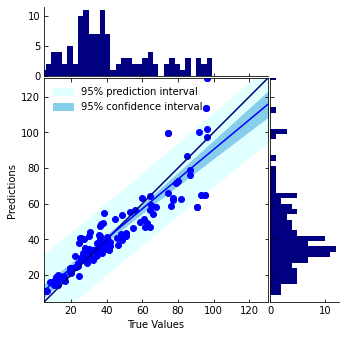

(194, 2) (194,)


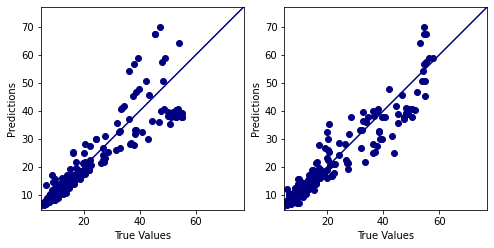

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


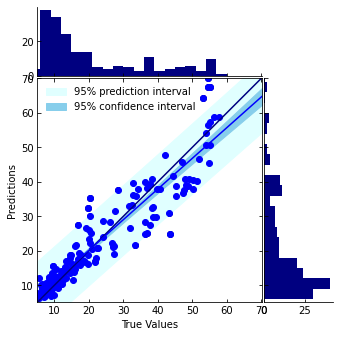

In [63]:
create_model_for_metric('CPU0User%')

vvvvvvv

(114, 2) (114,)
score  = 0.5259464200729547
coef   = [0.29343509 0.66255927]
intcpt = 102.99634378258034

slope 0.53 int 91.42
r2 0.53
r  0.73
mse 102064.37


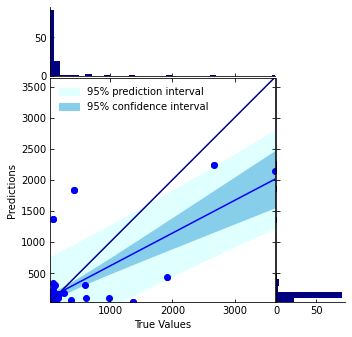

(194, 2) (194,)
score  = 0.32718589389411035
coef   = [0.48716287 0.66909246]
intcpt = 152.98730445692473

slope 0.33 int 211.73
r2 0.33
r  0.57
mse 268503.77


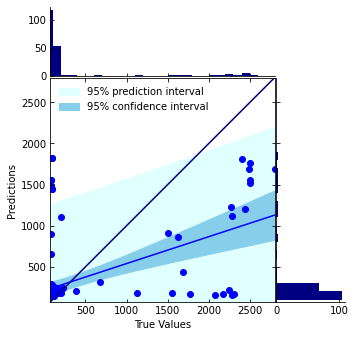

In [64]:
create_model_for_metric('response_time_p95', short=True, binwidth=100.0)

(114, 2) (114,)
score  = 0.9627365497309908
coef   = [0.97520509 1.03893872]
intcpt = 1.17321947140573

slope 0.96 int 0.91
r2 0.96
r  0.98
mse 4.25


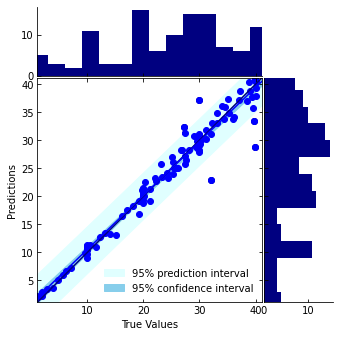

(194, 2) (194,)
score  = 0.970979481399606
coef   = [1.02434361 1.15767578]
intcpt = 0.17655714460201644

slope 0.97 int 0.46
r2 0.97
r  0.99
mse 4.73


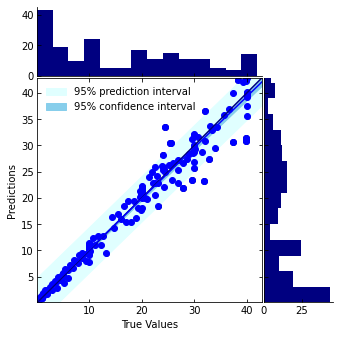

In [65]:
create_model_for_metric('request_rate', short=True)

(114, 2) (114,)
score  = 0.6549923511941276
coef   = [0.78514735 1.02216771]
intcpt = 13.426181520872497

slope 0.65 int 16.36
r2 0.65
r  0.81
mse 175.33


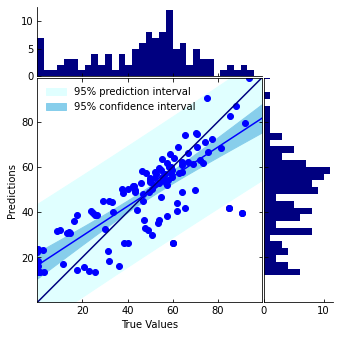

(194, 2) (194,)
score  = 0.6855208987373714
coef   = [0.81839626 0.98981005]
intcpt = 11.573752182180385

slope 0.69 int 16.38
r2 0.69
r  0.83
mse 154.14


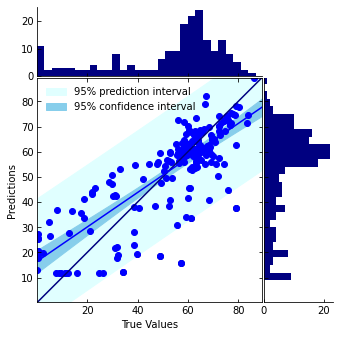

In [66]:
create_model_for_metric('CPU0Idle%', short=True)

(114, 2) (114,)
score  = 0.5005956087917363
coef   = [0.71763217 0.72565778]
intcpt = 21.517797990441743

slope 0.50 int 36.42
r2 0.50
r  0.71
mse 1500.11


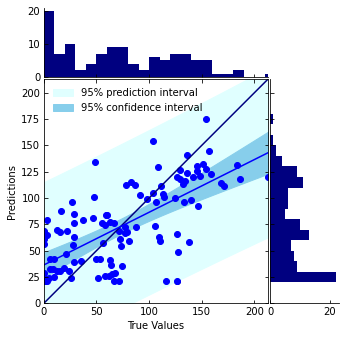

(194, 2) (194,)
score  = 0.7335595636002967
coef   = [0.84706443 0.91930659]
intcpt = 13.845818401888309

slope 0.73 int 22.57
r2 0.73
r  0.86
mse 1471.75


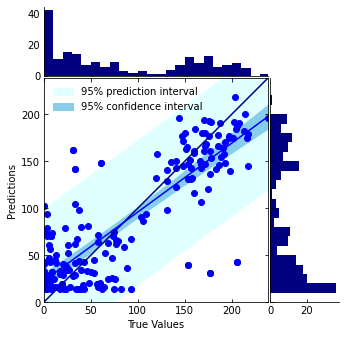

In [67]:
create_model_for_metric('[DSK:sda]RMerge', short=True, binwidth=10.0)

(114, 2) (114,)


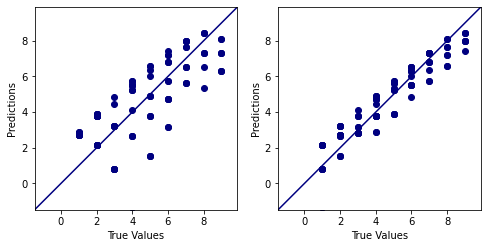

slope 0.88 int 0.55
r2 0.88
r  0.94
mse 0.72


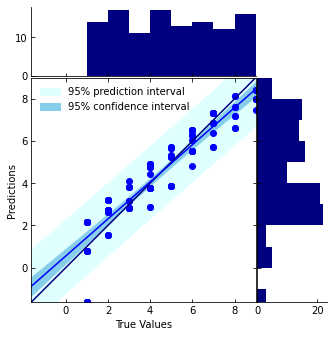

(194, 2) (194,)


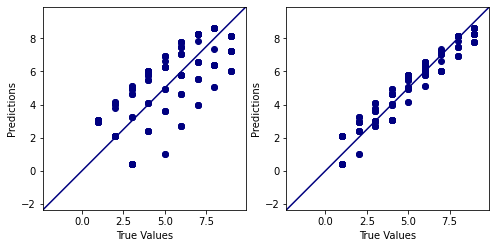

slope 0.91 int 0.47
r2 0.91
r  0.95
mse 0.58


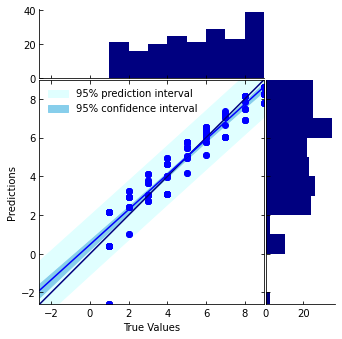

In [68]:
create_model_for_metric('worker_number', binwidth=1.0)

# szerintem valami alapjaiban nem jó

# hogy lehet az, hogy ezt nem képes tökéletesen megmondani?

maaaaaa

In [69]:
from sklearn.linear_model import LinearRegression

def get_all(columnname: str, level: str, short=True):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    for l in f1.index.levels[0]:
        f1.loc[l, (__next_name)] = f1.loc[l, (columnname)].shift(-1)
        f1.loc[l][__next_name] = f1.loc[l, (columnname)].shift(-1)
        
        f1.loc[l, (__prev_name)] = f1.loc[l, (columnname)].shift(+1)
        f1.loc[l][__prev_name] = f1.loc[l, (columnname)].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    
    l = level
    
    s = (__metric_term.loc[l].shape, __metric_next.loc[l].shape)
    

    lr = LinearRegression(fit_intercept=True)
    rr = lr.fit(__metric_term.loc[l], __metric_next.loc[l])
    rr.score(__metric_term.loc[l], __metric_next.loc[l])

    lrs.append(rr)

    __fit_score = rr.score(__metric_term.loc[l], __metric_next.loc[l])
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_

    __pred_metric = rr.predict(__metric_term.loc[l])

    if short == False:
        print('score  =', __fit_score)
        print('coef   =', __fit_coef_)
        print('intcpt =', __fit_intercept_)

        print()
    
#--------------------

    true = f1.loc[l][__next_name].values
    pred = __pred_metric

    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...

    if short == False:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)

    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if short == False:
    
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))

    return {'f1.shape': s,
            'score_or': __fit_score,
            'coef_or': __fit_coef_,
            'intercept_or': __fit_intercept_,
            'slope_tp': slope,
            'intercept_tp': intercept,
            'r2': r2,
            'r': r,
            'mse': mse}

In [70]:
get_all('CPU0Total%', 't14')

{'f1.shape': ((114, 2), (114,)),
 'score_or': 0.8346975188934086,
 'coef_or': array([0.81655257, 0.421871  ]),
 'intercept_or': 6.870221751073984,
 'slope_tp': 0.8346975188934087,
 'intercept_tp': 7.617689337662067,
 'r2': 0.8346975188934086,
 'r': 0.9136178188353206,
 'mse': 96.32932243771644}

In [71]:
get_all('CPU0Total%', 't15')

{'f1.shape': ((194, 2), (194,)),
 'score_or': 0.9000095691719929,
 'coef_or': array([0.87125765, 0.57701614]),
 'intercept_or': 3.239872776265514,
 'slope_tp': 0.9000095691719932,
 'intercept_tp': 3.799739454382645,
 'r2': 0.9000095691719927,
 'r': 0.9486883414335778,
 'mse': 77.15242046307432}

In [ ]:
# Fentinek meg az alábbinak azonosnak kell lennie -> ez csak egy ellenőrzés

(114, 2) (114,)


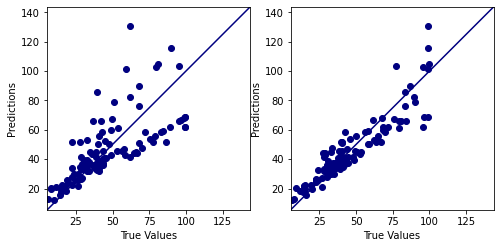

slope 0.83 int 7.62
r2 0.83
r  0.91
mse 96.33


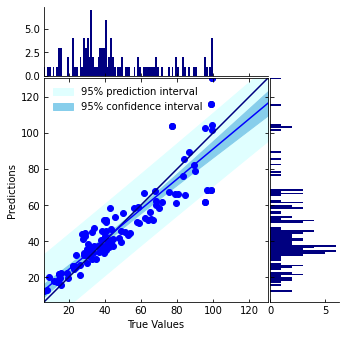

(194, 2) (194,)


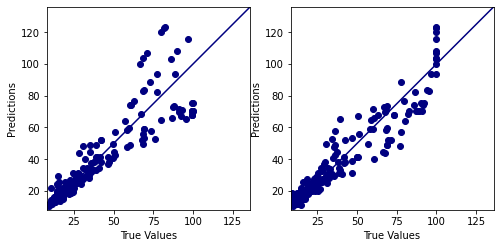

slope 0.90 int 3.80
r2 0.90
r  0.95
mse 77.15


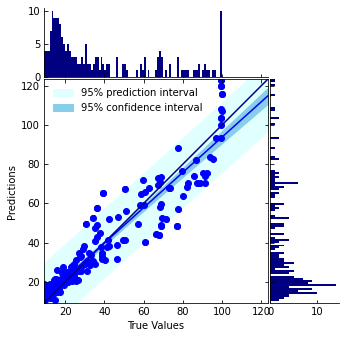

In [108]:
create_model_for_metric('CPU0Total%', binwidth=1.0)

In [66]:
print(colored('---------------------------------------', 'yellow'))
print(colored('---------------------------------------', 'red'))
print(colored('---------------------------------------', 'blue'))
print(colored('---------------------------------------', 'green'))
print(colored('---------------------------------------', 'magenta'))
print(colored('---------------------------------------', 'cyan'))

print(colored('--------------', color='red', on_color='on_grey'))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'reverse']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))

---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
--------------
--------------
--------------
--------------


In [72]:
def get_terms_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    for l in f1.index.levels[0]:
        f1.loc[l, (__next_name)] = f1.loc[l, (columnname)].shift(-1)
        f1.loc[l][__next_name] = f1.loc[l, (columnname)].shift(-1)
        
        f1.loc[l, (__prev_name)] = f1.loc[l, (columnname)].shift(+1)
        f1.loc[l][__prev_name] = f1.loc[l, (columnname)].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

In [73]:
import statsmodels.api as sm

__metric_term, __metric_next = get_terms_for_metric('CPU0Total%')

_x = sm.add_constant(__metric_term)


for l in _x.index.levels[0]:
    
    print(type(_x.loc[l]), _x.loc[l].shape)

    model = sm.OLS(__metric_next.loc[l], _x.loc[l])

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')
    
    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    # print(f'predicted response:\n{results.fittedvalues}')
    # print(f'predicted response:\n{results.predict(_x.loc[l])}')
    print('------------------------------------------------------------------------------')
    print(colored('------------------------------------------------------------------------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))


<class 'pandas.core.frame.DataFrame'> (114, 3)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     280.2
Date:                Sat, 13 May 2023   Prob (F-statistic):           4.12e-44
Time:                        12:37:34   Log-Likelihood:                -422.12
No. Observations:                 114   AIC:                             850.2
Df Residuals:                     111   BIC:                             858.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

In [74]:
# Naiv
#  m′ = m · w/(w + k)

In [75]:
import statsmodels.api as sm

__metric_term, __metric_next = get_terms_for_metric('CPU0Total%')

# Naiv -> csak az első tagot veszem figyelembe
__metric_term = __metric_term.drop(['CPU0Total%_term2'], axis=1)

_x = sm.add_constant(__metric_term)


for l in _x.index.levels[0]:
    
    print(type(_x.loc[l]), _x.loc[l].shape)

    model = sm.OLS(__metric_next.loc[l], _x.loc[l])

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')
    
    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    # print(f'predicted response:\n{results.fittedvalues}')
    # print(f'predicted response:\n{results.predict(_x.loc[l])}')
    print('------------------------------------------------------------------------------')
    print(colored('------------------------------------------------------------------------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))


<class 'pandas.core.frame.DataFrame'> (114, 2)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     237.2
Date:                Sat, 13 May 2023   Prob (F-statistic):           2.02e-29
Time:                        12:37:38   Log-Likelihood:                -459.91
No. Observations:                 114   AIC:                             923.8
Df Residuals:                     112   BIC:                             929.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

In [76]:
# Paraszt

# m' = b0 + b1*m + b2*w + b3*k

In [77]:
def get_terms_for_metric_paraszt(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    for l in f1.index.levels[0]:
        f1.loc[l, (__next_name)] = f1.loc[l, (columnname)].shift(-1)
        f1.loc[l][__next_name] = f1.loc[l, (columnname)].shift(-1)
        
        f1.loc[l, (__prev_name)] = f1.loc[l, (columnname)].shift(+1)
        f1.loc[l][__prev_name] = f1.loc[l, (columnname)].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

In [78]:
import statsmodels.api as sm

# Paraszt ->
__metric_term, __metric_next = get_terms_for_metric_paraszt('CPU0Total%')

_x = sm.add_constant(__metric_term)


for l in _x.index.levels[0]:
    
    print(type(_x.loc[l]), _x.loc[l].shape)

    model = sm.OLS(__metric_next.loc[l], _x.loc[l])

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')
    
    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    # print(f'predicted response:\n{results.fittedvalues}')
    # print(f'predicted response:\n{results.predict(_x.loc[l])}')
    print('------------------------------------------------------------------------------')
    print(colored('------------------------------------------------------------------------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))


<class 'pandas.core.frame.DataFrame'> (114, 4)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sat, 13 May 2023   Prob (F-statistic):           9.95e-37
Time:                        12:37:42   Log-Likelihood:                -436.72
No. Observations:                 114   AIC:                             881.4
Df Residuals:                     110   BIC:                             892.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

In [79]:
from sklearn.linear_model import LinearRegression

def create_model_for_metric_paraszt(columnname: str):
    
    ''' # Paraszt
        # m' = b0 + b1*m + b2*w + b3*k'
    '''
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    for l in f1.index.levels[0]:
        f1.loc[l, (__next_name)] = f1.loc[l, (columnname)].shift(-1)
        f1.loc[l][__next_name] = f1.loc[l, (columnname)].shift(-1)
        
        f1.loc[l, (__prev_name)] = f1.loc[l, (columnname)].shift(+1)
        f1.loc[l][__prev_name] = f1.loc[l, (columnname)].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3]]
    __metric_next = f1[__next_name]
    

    lrs = []
    pred_cpus = []
    
    for l in f1.index.levels[0]:
        
        print(__metric_term.loc[l].shape, __metric_next.loc[l].shape)
        
        lr = LinearRegression(fit_intercept=True)
        rr = lr.fit(__metric_term.loc[l], __metric_next.loc[l])
        rr.score(__metric_term.loc[l], __metric_next.loc[l])
        
        lrs.append(rr)
        
        __fit_score = rr.score(__metric_term.loc[l], __metric_next.loc[l])
    
        __fit_coef_ = rr.coef_
        
        __fit_intercept_ = rr.intercept_
        
        __pred_metric = rr.predict(__metric_term.loc[l])
        
        print('score  =', __fit_score)
        print('coef   =', __fit_coef_)
        print('intcpt =', __fit_intercept_)
    
        print()
    
        # Uristen geci bazmeg, hogy én mekkora fasz vagyok
    #    plot_true_vs_pred(f1[columnname].values, __pred_metric)
        # Ez itt a before vs pred_next
        # Nem pedig a next vs pred_next

    #    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
        # ugyan ez
        # plot_true_vs_pred(__metric_next, __pred_metric)

    # A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
        plot_true_vs_pred_two(f1.loc[l][columnname].values, __pred_metric, f1.loc[l][__next_name].values, __pred_metric)

        plot_true_vs_pred_hist_conf(f1.loc[l][__next_name].values, __pred_metric)


(114, 2) (114,)


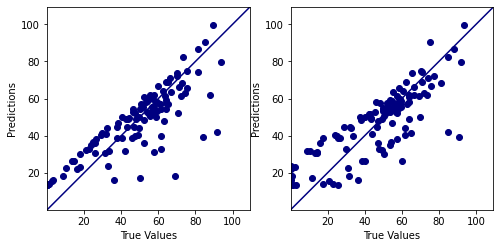

slope 0.65 int 16.36
r2 0.65
r  0.81
mse 175.33


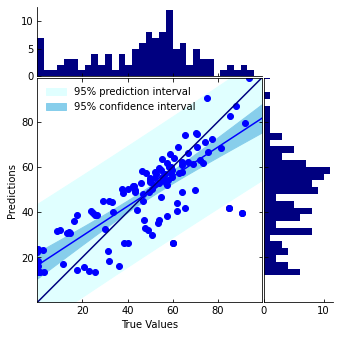

(194, 2) (194,)


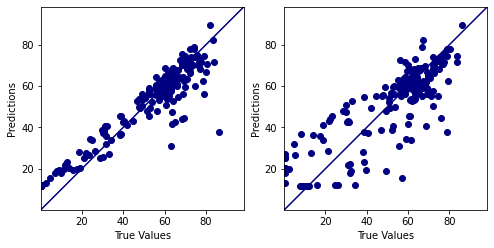

slope 0.69 int 16.38
r2 0.69
r  0.83
mse 154.14


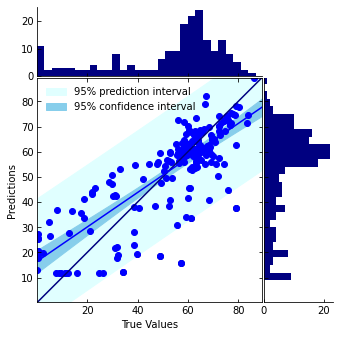

In [80]:
# régi (original)
create_model_for_metric('CPU0Idle%')

(114, 3) (114,)
score  = 0.7682550589932344
coef   = [0.80350618 1.03502105 7.04207059]
intcpt = 4.179908065191782



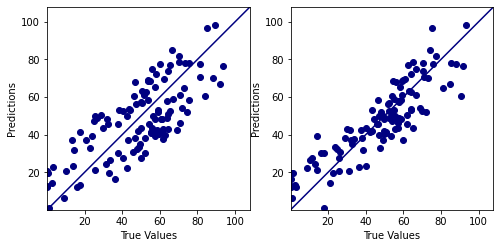

slope 0.77 int 10.99
r2 0.77
r  0.88
mse 117.77


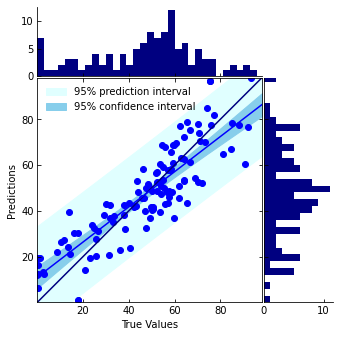

(194, 3) (194,)
score  = 0.7482117413410216
coef   = [0.75920143 1.67257522 4.70240201]
intcpt = 4.058703754570381



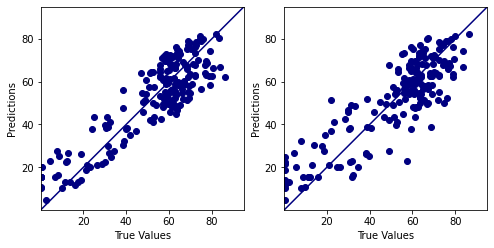

slope 0.75 int 13.12
r2 0.75
r  0.86
mse 123.42


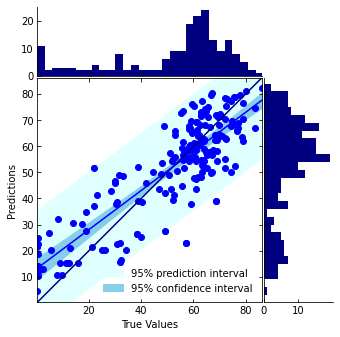

In [81]:
# paraszt (new)
create_model_for_metric_paraszt('CPU0Idle%')

(114, 2) (114,)


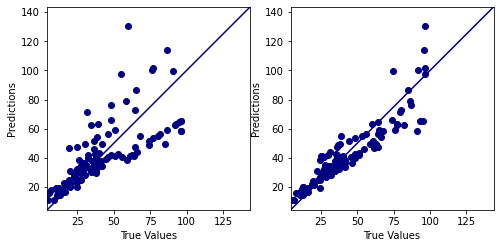

slope 0.83 int 7.20
r2 0.83
r  0.91
mse 96.52


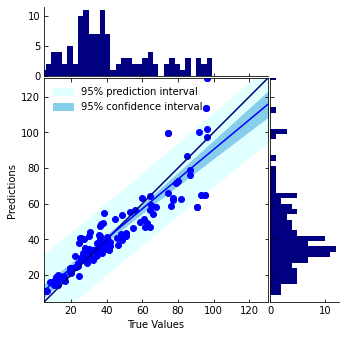

(194, 2) (194,)


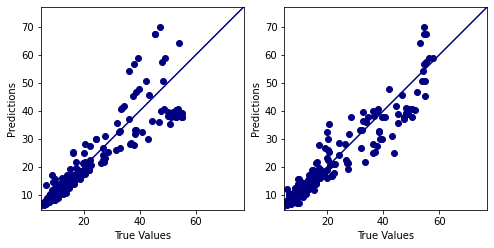

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


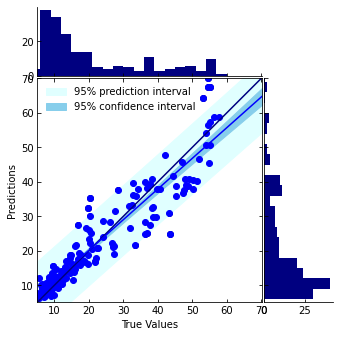

In [82]:
# régi (original)
create_model_for_metric('CPU0User%')

(114, 3) (114,)
score  = 0.78667813257467
coef   = [ 0.78161332 -1.59679038 -7.97386945]
intcpt = 17.029311984268297



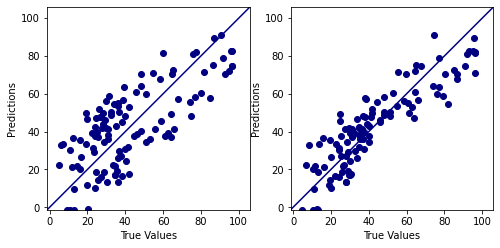

slope 0.79 int 9.15
r2 0.79
r  0.89
mse 122.60


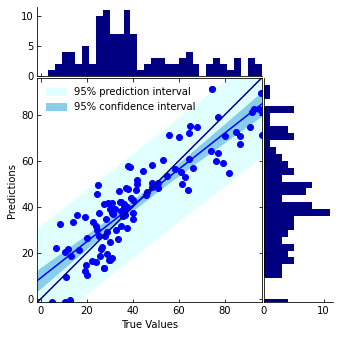

(194, 3) (194,)
score  = 0.8413400205594682
coef   = [ 0.83857748 -0.89835191 -2.88298166]
intcpt = 8.014876411389482



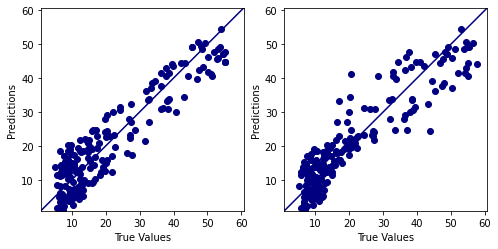

slope 0.84 int 3.36
r2 0.84
r  0.92
mse 36.89


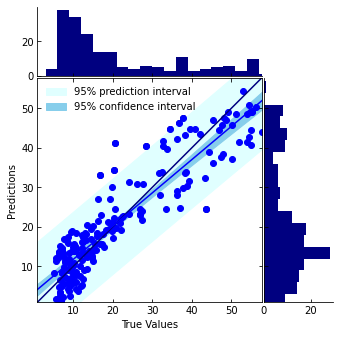

In [83]:
# paraszt (new)
create_model_for_metric_paraszt('CPU0User%')

(114, 2) (114,)


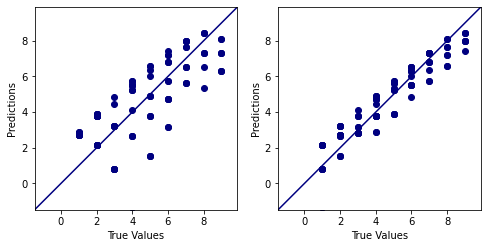

slope 0.88 int 0.55
r2 0.88
r  0.94
mse 0.72


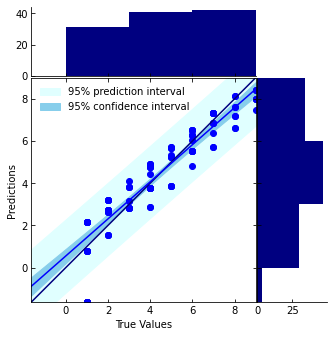

(194, 2) (194,)


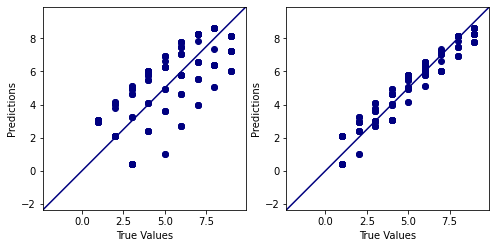

slope 0.91 int 0.47
r2 0.91
r  0.95
mse 0.58


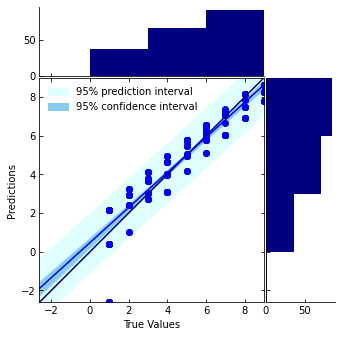

In [84]:
# régi (original)
create_model_for_metric('worker_number')

(114, 3) (114,)
score  = 1.0
coef   = [0.5 0.5 1. ]
intcpt = -2.6645352591003757e-15



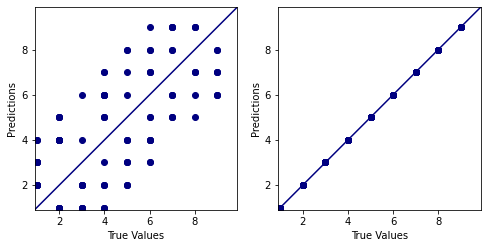

slope 1.00 int -0.00
r2 1.00
r  1.00
mse 0.00


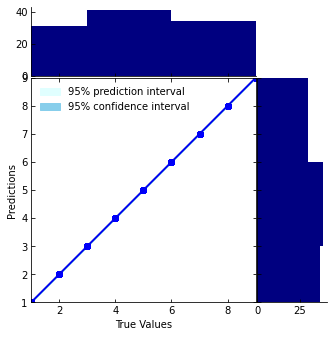

(194, 3) (194,)
score  = 1.0
coef   = [0.5 0.5 1. ]
intcpt = -8.881784197001252e-16



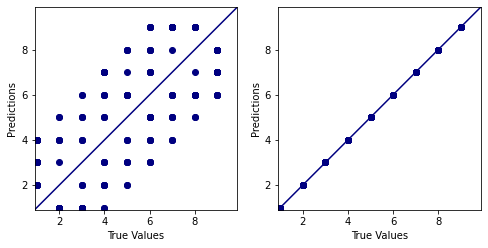

slope 1.00 int -0.00
r2 1.00
r  1.00
mse 0.00


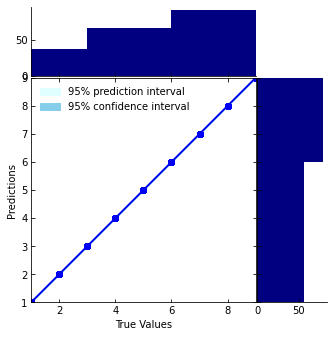

In [85]:
# paraszt (new)
create_model_for_metric_paraszt('worker_number')

In [86]:
# Hát ha az új plottot a valósat, a jót, a helyeset nézem (akármelyik modellel is) a kép már nem annyira rózsás

In [87]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

def corr(l: str):

    corr = mf.loc[l].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=False, linewidths=0.5, ax=ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    )
    
    return corr

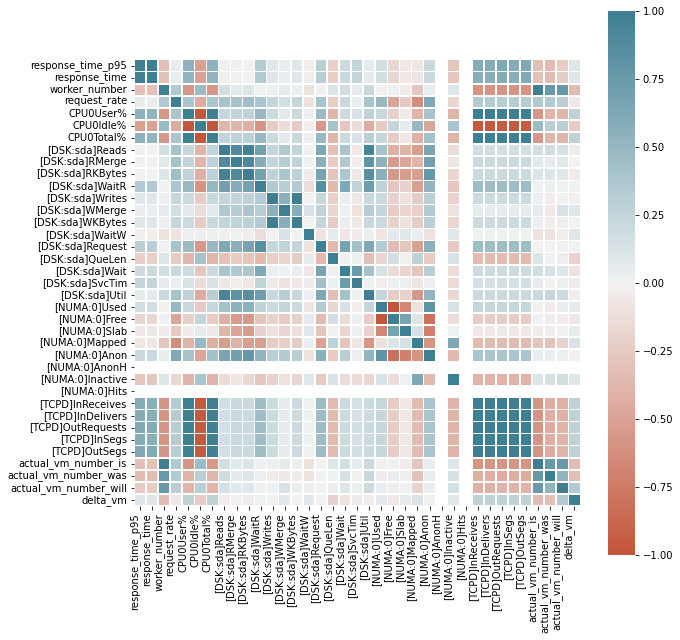

In [88]:
c14 = corr('t14')

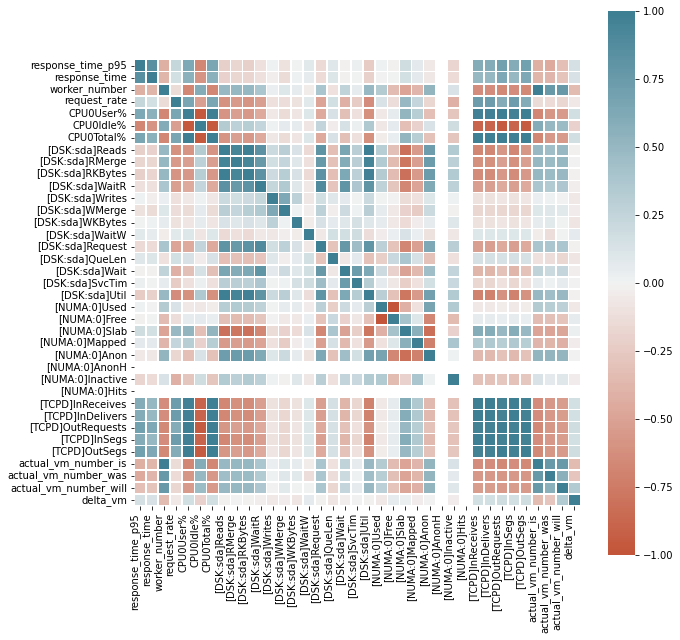

In [89]:
c15 = corr('t15')

In [90]:
# Hol van eltérés a két korrelációs mátrix között -> kivonom őket egymásból

In [91]:
# equivalent to df - sr
df = c14.subtract(c15)

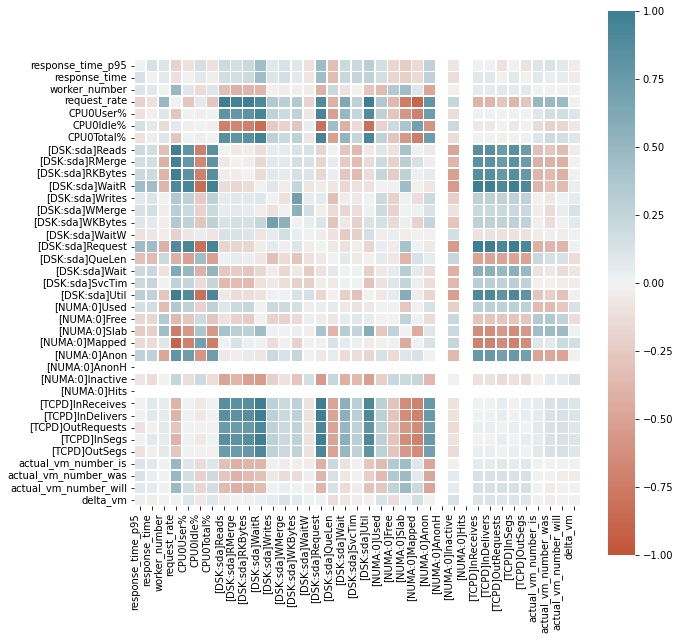

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    df, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [93]:
input_variables = ['CPU0User%', '[DSK:sda]WKBytes', 'request_rate', 'response_time', 'worker_number']

In [1]:
def color(val):
    luma = 100 - ((val * 50) + 50)
    luma = int(luma)
    luma = str(luma) + '%'
    color = 'hsl(9, 100%, ' + luma + ')'
    font = 'white'
    return 'background-color: %s; color: %s' % (color, font)

In [ ]:
pd.options.display.float_format = "{:,.2f}".format
_ = mf.loc['t14'][input_variables].corr()
_.style.applymap(color)

In [94]:
mf.loc['t14'][input_variables].corr()

CPU0User%  [DSK:sda]WKBytes  request_rate  response_time  \
CPU0User%          1.000000          0.205672      0.378135       0.534402   
[DSK:sda]WKBytes   0.205672          1.000000      0.243393       0.092864   
request_rate       0.378135          0.243393      1.000000       0.046132   
response_time      0.534402          0.092864      0.046132       1.000000   
worker_number     -0.573175          0.024000      0.351701      -0.304572   

                  worker_number  
CPU0User%             -0.573175  
[DSK:sda]WKBytes       0.024000  
request_rate           0.351701  
response_time         -0.304572  
worker_number          1.000000

In [95]:
mf.loc['t15'][input_variables].corr()

CPU0User%  [DSK:sda]WKBytes  request_rate  response_time  \
CPU0User%          1.000000         -0.073444      0.649597       0.557478   
[DSK:sda]WKBytes  -0.073444          1.000000     -0.101448       0.017907   
request_rate       0.649597         -0.101448      1.000000       0.156768   
response_time      0.557478          0.017907      0.156768       1.000000   
worker_number     -0.668593          0.053548     -0.137005      -0.388163   

                  worker_number  
CPU0User%             -0.668593  
[DSK:sda]WKBytes       0.053548  
request_rate          -0.137005  
response_time         -0.388163  
worker_number          1.000000

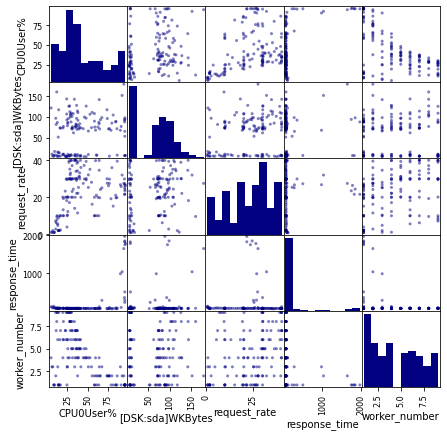

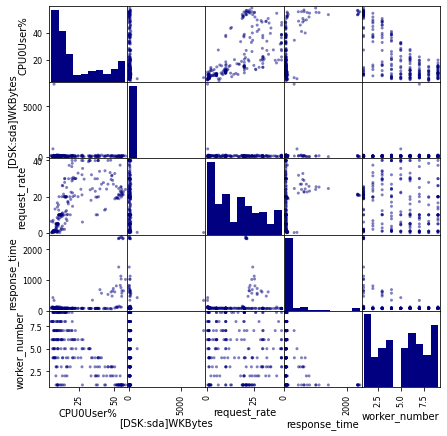

In [96]:
from pandas.plotting import scatter_matrix

for l in mf.index.levels[0]:

    scatter_matrix(mf.loc[l][input_variables], figsize=(7,7))
    plt.show()

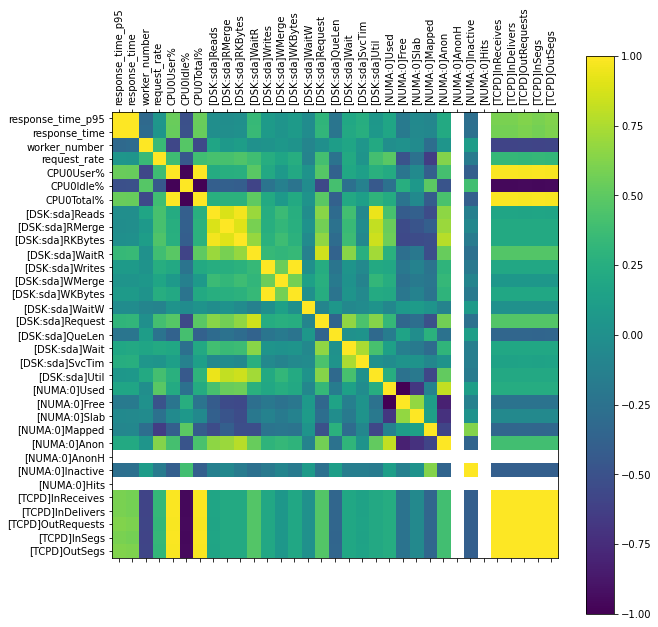

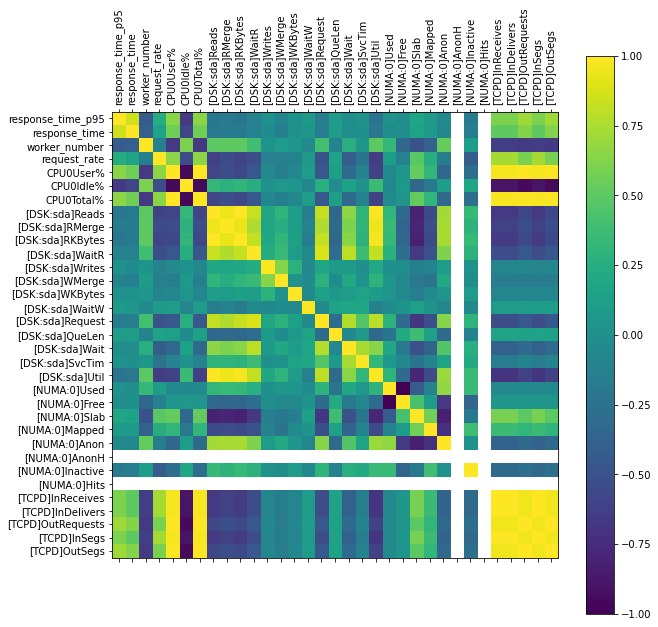

In [97]:
for l in mf.index.levels[0]:

    f = plt.figure(figsize=(10, 10))
    plt.matshow(cc.loc[l].corr(), fignum=f.number)
    plt.xticks(range(cc.loc[l].select_dtypes(['number']).shape[1]), cc.loc[l].select_dtypes(['number']).columns, fontsize=10, rotation=90)
    plt.yticks(range(cc.loc[l].select_dtypes(['number']).shape[1]), cc.loc[l].select_dtypes(['number']).columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.show()

In [98]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(2, 2))
df.head()    

0         1
0  0.548814  0.715189
1  0.602763  0.544883

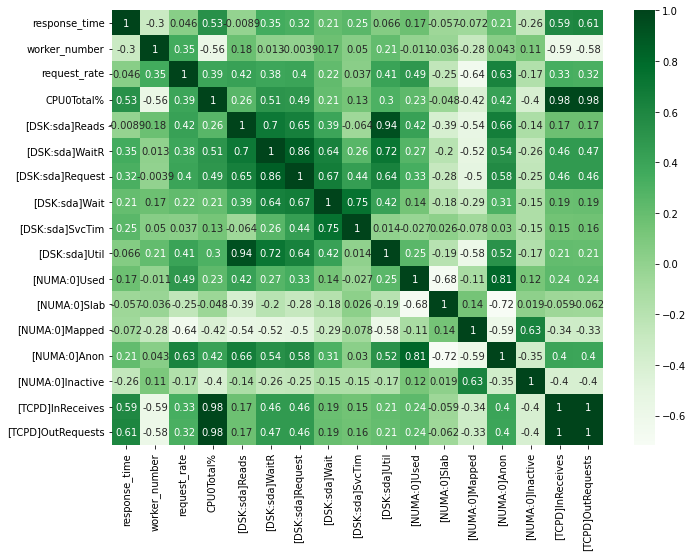

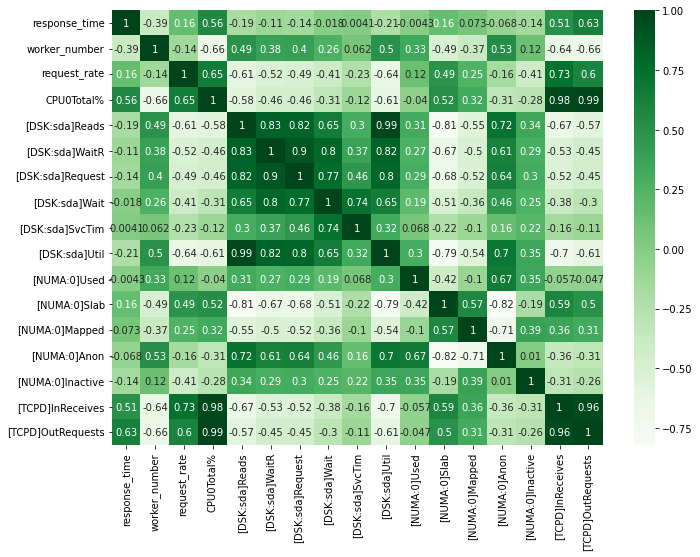

In [99]:
# Legalább ezt csináljam már meg úgy, hogy nincsenek benne a rendundánsok

df = mf.iloc[: , [4,5,6,9,10,13,18,20,21,22,23,25,26,27,29,31,33]].copy()

for l in mf.index.levels[0]:

    cf = df.loc[l]

    corr = cf.corr()
    plt.figure(figsize=(11,8))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.show()

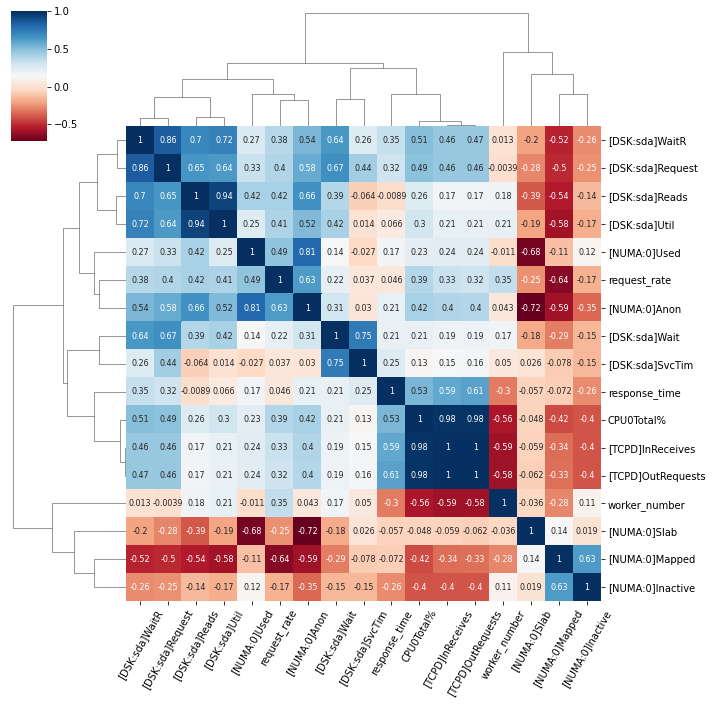

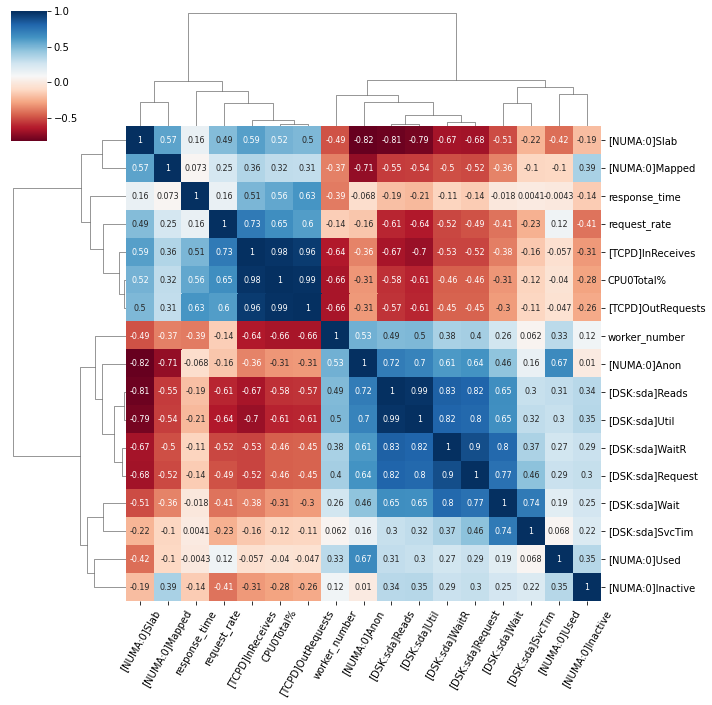

In [100]:
for l in mf.index.levels[0]:

    g = sns.clustermap(df.loc[l].corr(), 
                       method = 'complete', 
                       cmap   = 'RdBu', 
                       annot  = True, 
                       annot_kws = {'size': 8})
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

In [2]:
for l in mf.index.levels[0]:

    sns.regplot(x=mf.loc[l]['worker_number'],
                y=mf.loc[l]['CPU0Total%'],
                scatter_kws={
                    "color": "black",
                    "alpha": 0.5
                },
                line_kws={"color": "red"}).set(title='From experiment ' + str(l))
    plt.show()

NameError: name 'mf' is not defined

In [3]:
# ugyan az

cs = ['black', 'orange']

for i, l in enumerate(mf.index.levels[0]):

    sns.regplot(x='worker_number',
                y='CPU0Total%',
                data=mf.loc[l],
                label=str(l),
                scatter_kws={
                    # "color": "black",
                    "color": cs[i],
                    "alpha": 0.5
                },
                line_kws={"color": "red"})
    plt.legend()
    plt.plot()

NameError: name 'mf' is not defined

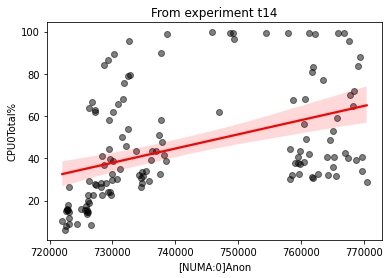

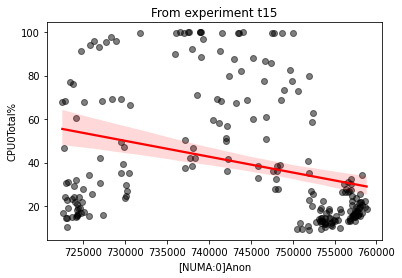

In [103]:
for l in mf.index.levels[0]:

    sns.regplot(x = mf.loc[l]['[NUMA:0]Anon'], y = mf.loc[l]['CPU0Total%'],
                scatter_kws = {"color": "black", "alpha": 0.5},
                line_kws = {"color": "red"},
                ci = 95).set(title='From experiment ' + str(l))
    plt.show()

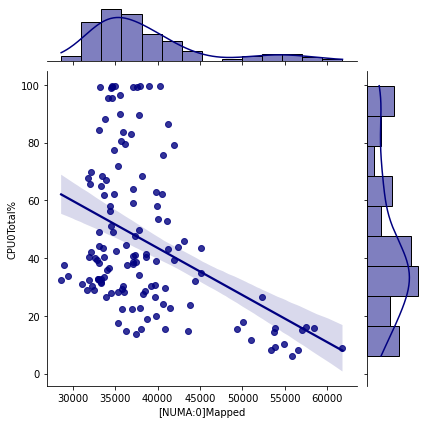

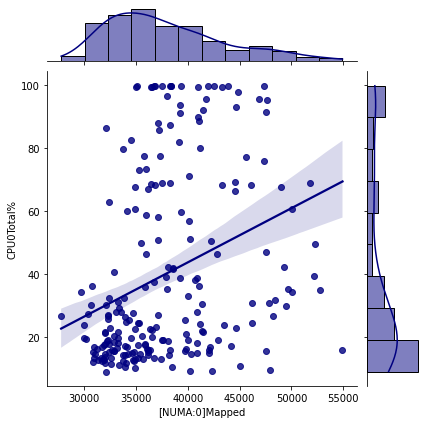

In [108]:
for l in mf.index.levels[0]:

    sns.jointplot(x='[NUMA:0]Mapped', y='CPU0Total%', data=mf.loc[l], kind='reg');

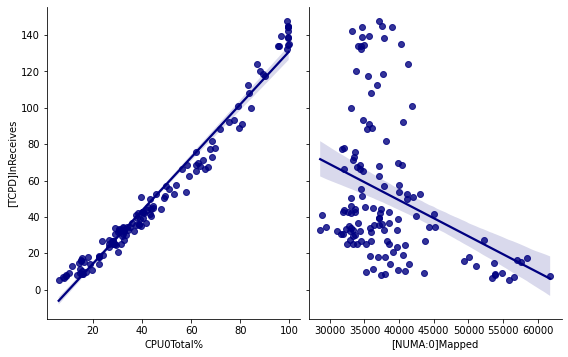

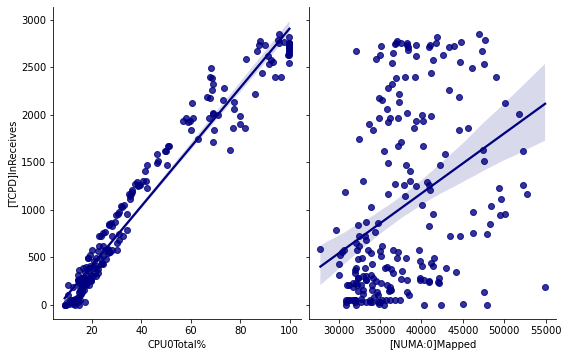

In [109]:
for l in mf.index.levels[0]:
    sns.pairplot(mf.loc[l], x_vars=['CPU0Total%', '[NUMA:0]Mapped'], y_vars=['[TCPD]InReceives'],
                 height=5, aspect=.8, kind='reg');

In [110]:
# Nézzük melyik metrikákkal correlál a worker_number és a delta_vm

# valójában a delta_m delta_vm érdekelne

In [111]:
an = mf.copy()

# Remove column name [...]
an = an.drop(['worker_give_metrics'], axis=1)
an = an.drop(['actual_vm_number_is', 'actual_vm_number_was', 'actual_vm_number_will'], axis=1)

# minden metrikára megcsinálni a nextet és kiszámolni a delta metrikát
column_names = an.columns

for columnname in column_names:
    __next_name = columnname + 'Nxt'
    
    for l in an.index.levels[0]:

        an.loc[l, (__next_name)] = an.loc[l, (columnname)].shift(-1)
        an.loc[l][__next_name] = an.loc[l, (columnname)].shift(-1)
        
indexAge = an[ (an['delta_vm'] == 0) ].index
an.drop(indexAge , inplace=True)
an = an.dropna()


# Mivel itt már nincs shift itt nem kell a level szerint leválogatni
for columnname in column_names:
    
    if an[columnname].values.dtype != object:
        __next_name = columnname + 'Nxt'
        __delta_next_name = columnname + 'NextDelta'
        an[__delta_next_name] = an[__next_name] - an[columnname]

# an = an[an.columns.drop(list(an.filter(regex='Nxt')))]

an[111:].head()

write_to_csv_time     time  response_time_p95  response_time  \
t14 128          16:55:12  16:55:1           85.53900      63.681882   
    129          16:55:22  16:55:2           81.42050      62.071564   
    130          16:55:32  16:55:3           83.65440      60.072178   
    131          16:55:42  16:55:4           80.27045      63.868745   
t15 0            20:07:33  20:07:3          170.48660     122.845000   

         worker_number  request_rate  CPU0User%  CPU0Idle%  CPU0Total%  \
t14 128              4          22.1       36.4       45.8        40.6   
    129              2          21.1       60.9       26.6        64.8   
    130              5          20.2       25.4       57.5        28.9   
    131              4          20.0       31.3       50.0        39.4   
t15 0                1           0.4        9.8       69.9        15.9   

         [DSK:sda]Reads  ...  [NUMA:0]AnonNextDelta  [NUMA:0]AnonHNextDelta  \
t14 128           240.1  ...                -1511.2                     0.0   
    129           173.1  ...                 2247.6                     0.0   
    130           186.3  ...                -1769.6                     0.0   
    131           200.9  ...                  315.6                     0.0   
t15 0             112.5  ...                -1707.2                     0.0   

         [NUMA:0]InactiveNextDelta  [NUMA:0]HitsNextDelta  \
t14 128                     1400.4                    0.0   
    129                    -1811.2                    0.0   
    130                     1814.8                    0.0   
    131                    -1526.0                    0.0   
t15 0                      -5654.0                    0.0   

         [TCPD]InReceivesNextDelta  [TCPD]InDeliversNextDelta  \
t14 128                       32.3                       32.3   
    129                      -40.8                      -40.8   
    130                        4.3                        4.3   
    131                       73.0                       73.0   
t15 0                        -51.7                      -51.7   

         [TCPD]OutRequestsNextDelta  [TCPD]InSegsNextDelta  \
t14 128                        28.4                   32.3   
    129                       -36.2                  -40.8   
    130                         4.7                    4.3   
    131                        69.9                   73.0   
t15 0                         -51.9                  -51.2   

         [TCPD]OutSegsNextDelta  delta_vmNextDelta  
t14 128                    28.4                5.0  
    129                   -36.2               -4.0  
    130                     4.7               -2.0  
    131                    69.9                3.0  
t15 0                     -51.3               -4.0  

[5 rows x 106 columns]

In [112]:
tmp = an[['worker_number', 'delta_vm', 'CPU0Total%', 'CPU0Total%Nxt', 'CPU0Total%NextDelta']]

tmp.head()

worker_number  delta_vm  CPU0Total%  CPU0Total%Nxt  CPU0Total%NextDelta
t14 0              1       2.0         9.0            8.3                 -0.7
    1              3      -2.0         8.3            9.1                  0.8
    3              1       3.0        10.4            6.1                 -4.3
    4              4      -1.0         6.1            8.0                  1.9
    5              3      -2.0         8.0           15.0                  7.0

In [113]:
# Oké eddig jó

# delta_vm-re agregálni a delta_metrikát
an.groupby(['delta_vm'])['CPU0Total%NextDelta'].mean()

# testekre
for l in an.index.levels[0]:
    _ = an.loc[l].groupby(['delta_vm'])['CPU0Total%NextDelta'].mean()
    print(_)

delta_vm
-3.0    25.258333
-2.0    16.736364
-1.0     9.060000
 1.0    -8.778947
 2.0   -15.760000
 3.0   -21.816667
Name: CPU0Total%NextDelta, dtype: float64
delta_vm
-3.0    11.233333
-2.0    11.011905
-1.0     6.857500
 1.0    -6.621875
 2.0   -10.035294
 3.0   -14.282143
Name: CPU0Total%NextDelta, dtype: float64


In [114]:
# Oké eddig jó

# erre kéne csinálni valami ANOVA elemzés és F-statistikát

# https://www.reneshbedre.com/blog/anova.html

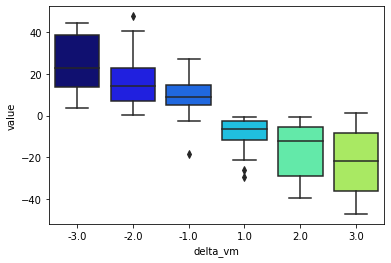

+-------------+----------+------+----------+---------------+
|             |   sum_sq |   df |        F |        PR(>F) |
|-------------+----------+------+----------+---------------|
| C(delta_vm) |  29206.4 |    5 |  39.3382 |   6.40895e-23 |
| Residual    |  16185.3 |  109 | nan      | nan           |
+-------------+----------+------+----------+---------------+


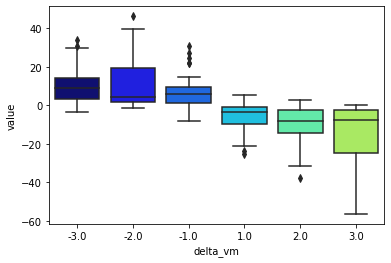

+-------------+----------+------+----------+---------------+
|             |   sum_sq |   df |        F |        PR(>F) |
|-------------+----------+------+----------+---------------|
| C(delta_vm) |  19783   |    5 |  30.7282 |   8.86463e-23 |
| Residual    |  24207.1 |  188 | nan      | nan           |
+-------------+----------+------+----------+---------------+


In [115]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

anova_tables = []

for l in an.index.levels[0]:
    # Csak egy változó értdekel
    tmp = av.loc[l][['delta_vm', 'CPU0Total%NextDelta']]

    tmp_melt = pd.melt(tmp.reset_index(), id_vars=['delta_vm'], value_vars=['CPU0Total%NextDelta'])

    tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=['CPU0Total%NextDelta'])
    tmp_melt = tmp_melt.drop('variable', axis=1)

    ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
    # ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt, color='#7d0013')
    # ax = sns.swarmplot(x='delta_vm', y='value', data=tmp_melt, size=5)
    # ax = sns.swarmplot(x='delta_vm', y='value', data=tmp_melt, color='#7d0013', size=5)
    plt.show()

    model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    # anova_table
    # display(anova_table)
    anova_tables.append(anova_table)

    print(anova_table.to_markdown(headers='keys', tablefmt='psql'))


In [116]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p<0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the CPU usage)

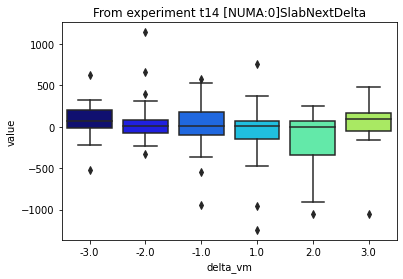

+-------------+-------------+------+-----------+------------+
|             |      sum_sq |   df |         F |     PR(>F) |
|-------------+-------------+------+-----------+------------|
| C(delta_vm) | 1.02908e+06 |    5 |   1.64268 |   0.154786 |
| Residual    | 1.3657e+07  |  109 | nan       | nan        |
+-------------+-------------+------+-----------+------------+


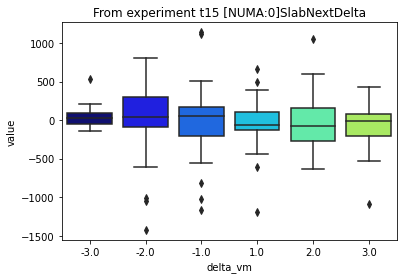

+-------------+------------------+------+------------+------------+
|             |           sum_sq |   df |          F |     PR(>F) |
|-------------+------------------+------+------------+------------|
| C(delta_vm) | 165734           |    5 |   0.229943 |   0.949091 |
| Residual    |      2.71006e+07 |  188 | nan        | nan        |
+-------------+------------------+------+------------+------------+


In [117]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

def box_plot(columnname: str):
    anova_tables = []
    for l in av.index.levels[0]:
        # Csak egy változó értdekel
        tmp = av.loc[l][['delta_vm', columnname]]
        tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=[columnname])
        tmp_melt = tmp_melt.drop('variable', axis=1)

        ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
        ax.set(title='From experiment ' + str(l) + ' ' + columnname)
        plt.show()

        model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_tables.append(anova_table)
        print(anova_table.to_markdown(headers='keys', tablefmt='psql'))

box_plot('[NUMA:0]SlabNextDelta')


In [118]:
# Interpretation

# Érdekes itt például nem szignifikáns az eltérés.

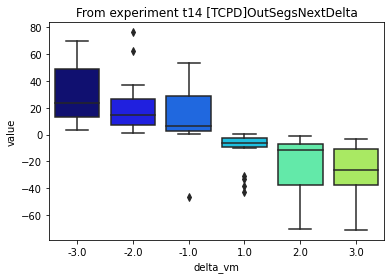

+-------------+----------+------+----------+---------------+
|             |   sum_sq |   df |        F |        PR(>F) |
|-------------+----------+------+----------+---------------|
| C(delta_vm) |  48831.1 |    5 |  24.6065 |   1.62219e-16 |
| Residual    |  43261.6 |  109 | nan      | nan           |
+-------------+----------+------+----------+---------------+


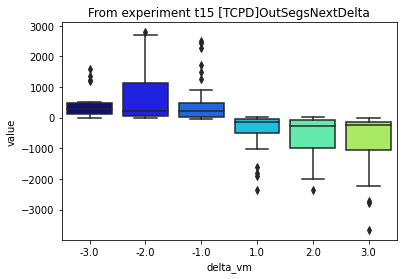

+-------------+-------------+------+----------+---------------+
|             |      sum_sq |   df |        F |        PR(>F) |
|-------------+-------------+------+----------+---------------|
| C(delta_vm) | 6.52347e+07 |    5 |  22.6418 |   9.45765e-18 |
| Residual    | 1.08332e+08 |  188 | nan      | nan           |
+-------------+-------------+------+----------+---------------+


In [119]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

box_plot('[TCPD]OutSegsNextDelta')


In [120]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p<0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the TCP Sent out packet)

In [121]:

aa = an[an.columns.drop(list(an.filter(regex='^((?!NextDelta).)*$')))]

aa.columns

# jobb ez mint a regex

aa = an[an.columns.difference([i for i in an.columns if 'NextDelta' not in i])]

aa = an[an.columns.difference([i for i in an.columns if ('NextDelta' not in i) and ('delta_vm' not in i)])]

aa = aa.drop('worker_numberNextDelta', axis=1)

aa.columns


Index(['CPU0Idle%NextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta',
       '[DSK:sda]QueLenNextDelta', '[DSK:sda]RKBytesNextDelta',
       '[DSK:sda]RMergeNextDelta', '[DSK:sda]ReadsNextDelta',
       '[DSK:sda]RequestNextDelta', '[DSK:sda]SvcTimNextDelta',
       '[DSK:sda]UtilNextDelta', '[DSK:sda]WKBytesNextDelta',
       '[DSK:sda]WMergeNextDelta', '[DSK:sda]WaitNextDelta',
       '[DSK:sda]WaitRNextDelta', '[DSK:sda]WaitWNextDelta',
       '[DSK:sda]WritesNextDelta', '[NUMA:0]AnonHNextDelta',
       '[NUMA:0]AnonNextDelta', '[NUMA:0]FreeNextDelta',
       '[NUMA:0]HitsNextDelta', '[NUMA:0]InactiveNextDelta',
       '[NUMA:0]MappedNextDelta', '[NUMA:0]SlabNextDelta',
       '[NUMA:0]UsedNextDelta', '[TCPD]InDeliversNextDelta',
       '[TCPD]InReceivesNextDelta', '[TCPD]InSegsNextDelta',
       '[TCPD]OutRequestsNextDelta', '[TCPD]OutSegsNextDelta', 'delta_vm',
       'delta_vmNextDelta', 'delta_vmNxt', 'request_rateNextDelta',
       'response_timeNextDelta', 'response_time_p

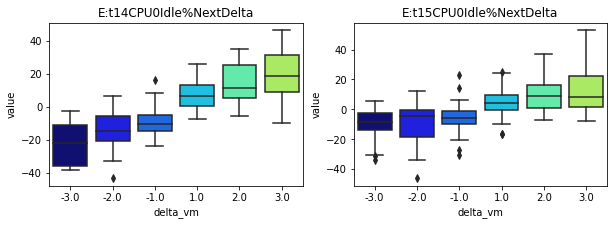

['CPU0Idle%NextDelta', 2.767982921819249e-20, 1.528783803055136e-17]


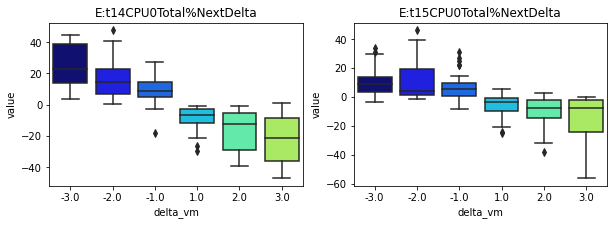

['CPU0Total%NextDelta', 6.408946036381991e-23, 8.864632989293283e-23]


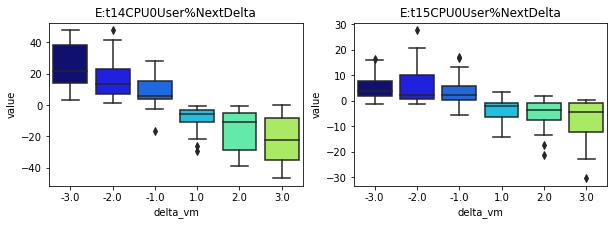

['CPU0User%NextDelta', 4.8567561241741116e-23, 9.3020164295704e-22]


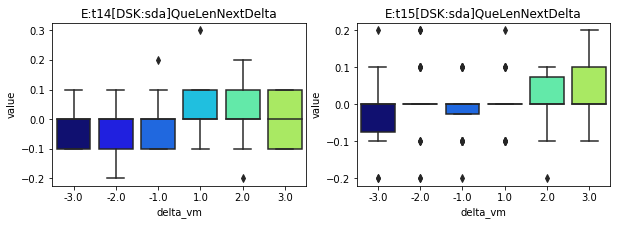

['[DSK:sda]QueLenNextDelta', 0.011884098801344953, 0.24129378789796402]
['[DSK:sda]RKBytesNextDelta', 0.9156106277064384, 0.1485935744053779]
['[DSK:sda]RMergeNextDelta', 0.7458146660533138, 0.3986188069418289]
['[DSK:sda]ReadsNextDelta', 0.9496804309572467, 0.3952838224200064]


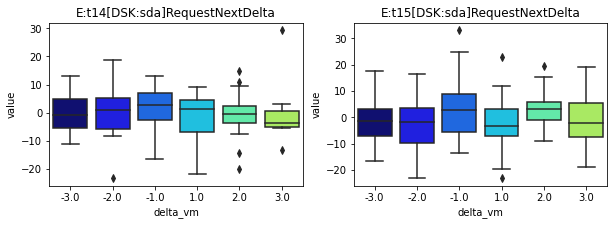

['[DSK:sda]RequestNextDelta', 0.934275944804265, 0.054602662014253206]
['[DSK:sda]SvcTimNextDelta', 0.30847537210064596, 0.5116128100514654]


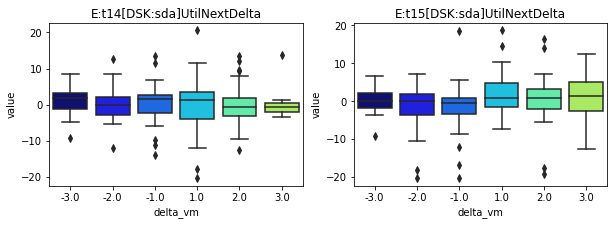

['[DSK:sda]UtilNextDelta', 0.9988393168247899, 0.08796435086316484]
['[DSK:sda]WKBytesNextDelta', 0.509435587876895, 0.55733424206769]
['[DSK:sda]WMergeNextDelta', 0.8963863828423505, 0.8568385842789425]
['[DSK:sda]WaitNextDelta', 0.17635665206600054, 0.15134374144300303]
['[DSK:sda]WaitRNextDelta', 0.9206443311250542, 0.10346796092702215]
['[DSK:sda]WaitWNextDelta', 0.6352818665764504, 0.5968526276336908]
['[DSK:sda]WritesNextDelta', 0.4808477861614595, 0.6668995825558802]
['[NUMA:0]AnonHNextDelta', nan, nan]


/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 0
  warnings.warn('covariance of constraints does not have full '


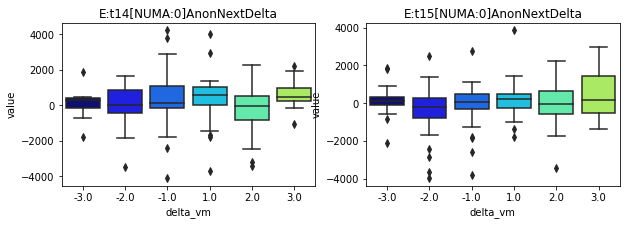

['[NUMA:0]AnonNextDelta', 0.6242245293449764, 0.07500385842230717]
['[NUMA:0]FreeNextDelta', 0.21946074165361987, 0.7091171871469304]
['[NUMA:0]HitsNextDelta', nan, nan]
['[NUMA:0]InactiveNextDelta', 0.3931828676192758, 0.467182328185457]
['[NUMA:0]MappedNextDelta', 0.15136850872848162, 0.5989937745731151]
['[NUMA:0]SlabNextDelta', 0.15478647148963576, 0.9490906765044914]


/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 0
  warnings.warn('covariance of constraints does not have full '


['[NUMA:0]UsedNextDelta', 0.21946074165362497, 0.7091171871469371]


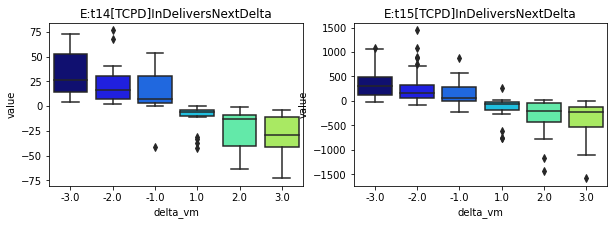

['[TCPD]InDeliversNextDelta', 3.659234757439463e-18, 9.093517391060103e-22]


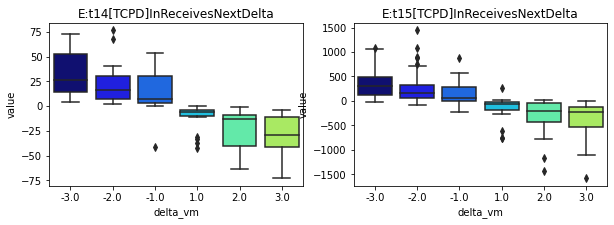

['[TCPD]InReceivesNextDelta', 3.659234757439463e-18, 9.093517391060103e-22]


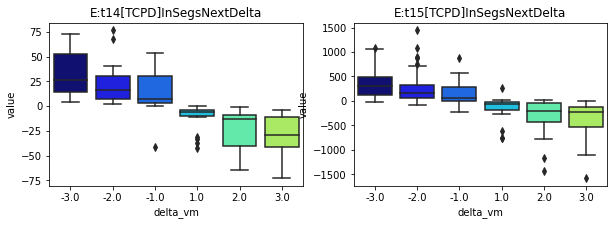

['[TCPD]InSegsNextDelta', 3.812109941195459e-18, 9.048005186526759e-22]


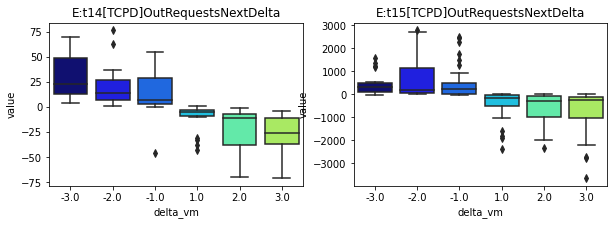

['[TCPD]OutRequestsNextDelta', 1.5102736320183268e-16, 9.423178385200967e-18]


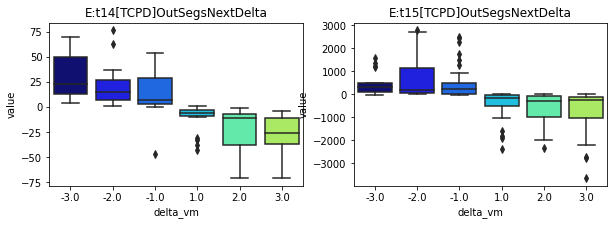

['[TCPD]OutSegsNextDelta', 1.6221917499485951e-16, 9.457649281160983e-18]


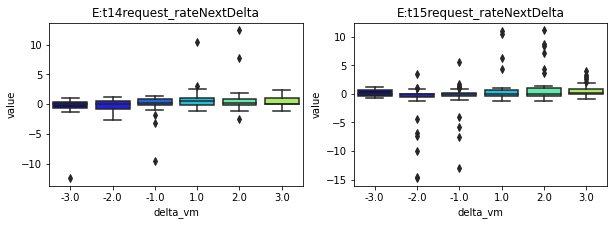

['request_rateNextDelta', 0.08992654139520027, 0.0007576453837926457]


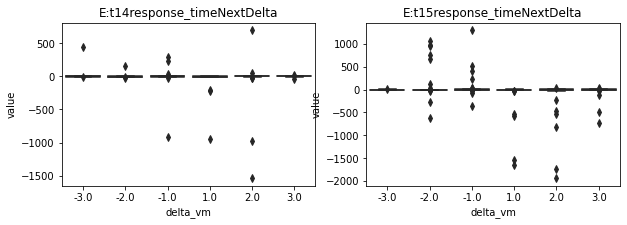

['response_timeNextDelta', 0.6751083441883141, 0.003950436889887825]
['response_time_p95NextDelta', 0.5280262802743385, 0.40340015111216976]


Metric   t14   t15
0           CPU0Idle%NextDelta  0.00  0.00
1          CPU0Total%NextDelta  0.00  0.00
2           CPU0User%NextDelta  0.00  0.00
3     [DSK:sda]QueLenNextDelta  0.01  0.24
4    [DSK:sda]RKBytesNextDelta  0.92  0.15
5     [DSK:sda]RMergeNextDelta  0.75  0.40
6      [DSK:sda]ReadsNextDelta  0.95  0.40
7    [DSK:sda]RequestNextDelta  0.93  0.05
8     [DSK:sda]SvcTimNextDelta  0.31  0.51
9       [DSK:sda]UtilNextDelta  1.00  0.09
10   [DSK:sda]WKBytesNextDelta  0.51  0.56
11    [DSK:sda]WMergeNextDelta  0.90  0.86
12      [DSK:sda]WaitNextDelta  0.18  0.15
13     [DSK:sda]WaitRNextDelta  0.92  0.10
14     [DSK:sda]WaitWNextDelta  0.64  0.60
15    [DSK:sda]WritesNextDelta  0.48  0.67
17       [NUMA:0]AnonNextDelta  0.62  0.08
18       [NUMA:0]FreeNextDelta  0.22  0.71
20   [NUMA:0]InactiveNextDelta  0.39  0.47
21     [NUMA:0]MappedNextDelta  0.15  0.60
22       [NUMA:0]SlabNextDelta  0.15  0.95
23       [NUMA:0]UsedNextDelta  0.22  0.71
24   [TCPD]InDeliversNextDelta  0.00  0.00
25   [TCPD]InReceivesNextDelta  0.00  0.00
26       [TCPD]InSegsNextDelta  0.00  0.00
27  [TCPD]OutRequestsNextDelta  0.00  0.00
28      [TCPD]OutSegsNextDelta  0.00  0.00
29       request_rateNextDelta  0.09  0.00
30      response_timeNextDelta  0.68  0.00
31  response_time_p95NextDelta  0.53  0.40

In [122]:
# Oké eddig jó

# Ennél mélyebben szerintem nem kell foglalkozni azzal, hogy delta_vm milyen delta_vm hatást ért el az egyes
# metrikákban.

# Esetleg amire még kíváncs lennék, hogy ha szisztematikusan kiszámolnám az F-statisztikát minden delta_metrikára
# akkor melyek lennének szignifikánsak

# Oké ez eddig jó

sig_s = []

ns = len(aa.index.levels[0])

c_names = []
c_names.append('Metric')
for i in aa.columns:
    if 'delta_vm' not in i:
        sig_t = []
        tmp_s = []
        nam_s = []
        # Csak egy változó értdekel
        for l in aa.index.levels[0]:
            tmp = aa.loc[l][['delta_vm', i]]
            tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=[i])
            tmp_melt = tmp_melt.drop('variable', axis=1)

            model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            sig = anova_table['PR(>F)'][0]
            sig_t.append(sig)
            tmp_s.append(tmp_melt)
            nam_s.append(l)

        if min(sig_t) < 0.1:
            fig, axs = plt.subplots(1, ns, figsize=(5 * ns,3))
            for j in range(ns):
                axs[j] = sns.boxplot(x="delta_vm", y="value", data=tmp_s[j], ax=axs[j])
                axs[j].set_title('E:' + str(nam_s[j]) + i)
            
            plt.show()

#        sig_s.append([i, sig_t])

        sig_tmp = []
        sig_tmp.append(i)
        for _ in range(ns):
            sig_tmp.append(sig_t[_])
        sig_s.append(sig_tmp)
        print(sig_tmp)

for _ in aa.index.levels[0]:
    c_names.append(_)

sig = pd.DataFrame(sig_s, columns=c_names)

sig = sig.dropna()

for _ in aa.index.levels[0]:
    sig[_] = sig[_].apply(lambda x: float("{:.2f}".format(x)))

sig


In [123]:
def color(val):
    if val <= 0.1:
        color = 'green'
    elif val > 0.1:
        color = 'yellow'
    else:
        color = 'white'
    return 'background-color: %s' % color

sig.style.applymap(color, subset=['t14'])
sig.style.applymap(color, subset=['t15'])
sig.style.applymap(color, subset=['t14','t15'])

In [124]:
# Oké eddig jó

# Most már látom, hogy melyek azok a metrikák amelyek signifiánsan változnak a delta_vm hatására az adott feladatban



In [125]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
for l in an.index.levels[0]:
    _ = an.loc[l].groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()
    print(l)
    display(_)

t14


CPU0Total%NextDelta  CPU0User%NextDelta
delta_vm                                         
-3.0                25.258333           25.291667
-2.0                16.736364           16.700000
-1.0                 9.060000            8.920000
 1.0                -8.778947           -8.736842
 2.0               -15.760000          -15.612000
 3.0               -21.816667          -21.958333

t15


CPU0Total%NextDelta  CPU0User%NextDelta
delta_vm                                         
-3.0                11.233333            5.916667
-2.0                11.011905            6.061905
-1.0                 6.857500            3.932500
 1.0                -6.621875           -3.750000
 2.0               -10.035294           -5.279412
 3.0               -14.282143           -7.775000

In [126]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
v = an.columns[73:80]
for l in an.index.levels[0]:
    _ = an.loc[l].groupby(['delta_vm'])[v].mean()
    print(l)
    display(_)

t14


response_timeNextDelta  worker_numberNextDelta  \
delta_vm                                                   
-3.0                   35.637025                    -3.0   
-2.0                    4.318831                    -2.0   
-1.0                  -16.702255                    -1.0   
 1.0                  -72.553871                     1.0   
 2.0                  -70.724839                     2.0   
 3.0                    0.024721                     3.0   

          request_rateNextDelta  CPU0User%NextDelta  CPU0Idle%NextDelta  \
delta_vm                                                                  
-3.0                  -1.033333           25.291667          -22.525000   
-2.0                  -0.181818           16.700000          -14.550000   
-1.0                  -0.212000            8.920000           -8.636000   
 1.0                   1.084211           -8.736842            7.589474   
 2.0                   0.984000          -15.612000           13.908000   
 3.0                   0.375000          -21.958333           19.350000   

          CPU0Total%NextDelta  [DSK:sda]ReadsNextDelta  
delta_vm                                                
-3.0                25.258333                 2.158333  
-2.0                16.736364                -5.750000  
-1.0                 9.060000                 8.588000  
 1.0                -8.778947                 1.242105  
 2.0               -15.760000                 2.080000  
 3.0               -21.816667                 4.883333

t15


response_timeNextDelta  worker_numberNextDelta  \
delta_vm                                                   
-3.0                   -2.041635                    -3.0   
-2.0                   84.646134                    -2.0   
-1.0                   51.090980                    -1.0   
 1.0                 -137.454459                     1.0   
 2.0                 -167.624644                     2.0   
 3.0                  -45.196082                     3.0   

          request_rateNextDelta  CPU0User%NextDelta  CPU0Idle%NextDelta  \
delta_vm                                                                  
-3.0                   0.100000            5.916667          -10.911111   
-2.0                  -1.359524            6.061905           -9.619048   
-1.0                  -0.540000            3.932500           -6.040000   
 1.0                   0.884375           -3.750000            5.006250   
 2.0                   1.264706           -5.279412            9.914706   
 3.0                   0.660714           -7.775000           12.757143   

          CPU0Total%NextDelta  [DSK:sda]ReadsNextDelta  
delta_vm                                                
-3.0                11.233333                -6.294444  
-2.0                11.011905                -7.533333  
-1.0                 6.857500                -2.302500  
 1.0                -6.621875                13.065625  
 2.0               -10.035294                 1.338235  
 3.0               -14.282143                 5.028571

In [127]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt csak a deltákra és elforgatva
v = an.columns[73:105]
for l in an.index.levels[0]:
    _ = an.loc[l].groupby(['delta_vm'])[v].mean().round(2).T
    print(l)
    display(_)

t14


delta_vm                      -3.0    -2.0    -1.0      1.0      2.0      3.0
response_timeNextDelta       35.64    4.32  -16.70   -72.55   -70.72     0.02
worker_numberNextDelta       -3.00   -2.00   -1.00     1.00     2.00     3.00
request_rateNextDelta        -1.03   -0.18   -0.21     1.08     0.98     0.37
CPU0User%NextDelta           25.29   16.70    8.92    -8.74   -15.61   -21.96
CPU0Idle%NextDelta          -22.52  -14.55   -8.64     7.59    13.91    19.35
CPU0Total%NextDelta          25.26   16.74    9.06    -8.78   -15.76   -21.82
[DSK:sda]ReadsNextDelta       2.16   -5.75    8.59     1.24     2.08     4.88
[DSK:sda]RMergeNextDelta      0.33    6.59   -4.09    -2.05    -1.99    17.05
[DSK:sda]RKBytesNextDelta    96.27 -226.16  258.62    24.58   168.97   123.50
[DSK:sda]WaitRNextDelta       0.14   -0.01    0.04     0.03    -0.06     0.04
[DSK:sda]WritesNextDelta     -5.38    2.87   -2.16     1.93    -2.03     3.89
[DSK:sda]WMergeNextDelta      0.06    0.07   -0.16    -0.05     0.08     0.18
[DSK:sda]WKBytesNextDelta   -23.24   13.11   -9.77     8.01    -8.82    17.53
[DSK:sda]WaitWNextDelta      -0.18    0.09   -0.10    -0.05    -1.71     0.12
[DSK:sda]RequestNextDelta    -0.37    0.05    1.31    -1.33    -0.51    -0.67
[DSK:sda]QueLenNextDelta     -0.03   -0.03   -0.02     0.03     0.04     0.01
[DSK:sda]WaitNextDelta       -0.23    0.10   -0.14     0.11    -0.05     0.21
[DSK:sda]SvcTimNextDelta     -0.34    0.10   -0.06    -0.02    -0.11     0.29
[DSK:sda]UtilNextDelta        0.90    0.04    0.39    -0.09     0.08     0.20
[NUMA:0]UsedNextDelta       366.83 -452.73  760.88  -473.54 -1718.74  2219.40
[NUMA:0]FreeNextDelta      -366.83  452.73 -760.88   473.54  1718.74 -2219.40
[NUMA:0]SlabNextDelta        75.30   71.33    9.20   -90.86  -174.80    26.57
[NUMA:0]MappedNextDelta     724.43 -205.11  825.92 -1009.05 -1305.41   572.30
[NUMA:0]AnonNextDelta        96.83  -29.42  353.17   356.86  -131.90   649.63
[NUMA:0]AnonHNextDelta        0.00    0.00    0.00     0.00     0.00     0.00
[NUMA:0]InactiveNextDelta    -5.47  158.76  376.77   -64.91 -1601.06   557.23
[NUMA:0]HitsNextDelta         0.00    0.00    0.00     0.00     0.00     0.00
[TCPD]InReceivesNextDelta    34.64   21.05   14.56   -11.88   -22.91   -28.59
[TCPD]InDeliversNextDelta    34.64   21.05   14.56   -11.88   -22.91   -28.59
[TCPD]OutRequestsNextDelta   32.52   19.65   13.81   -11.06   -22.04   -26.57
[TCPD]InSegsNextDelta        34.72   21.01   14.59   -11.94   -22.95   -28.58
[TCPD]OutSegsNextDelta       32.54   19.59   13.84   -11.09   -22.06   -26.55

t15


delta_vm                       -3.0     -2.0    -1.0     1.0     2.0     3.0
response_timeNextDelta        -2.04    84.65   51.09 -137.45 -167.62  -45.20
worker_numberNextDelta        -3.00    -2.00   -1.00    1.00    2.00    3.00
request_rateNextDelta          0.10    -1.36   -0.54    0.88    1.26    0.66
CPU0User%NextDelta             5.92     6.06    3.93   -3.75   -5.28   -7.78
CPU0Idle%NextDelta           -10.91    -9.62   -6.04    5.01    9.91   12.76
CPU0Total%NextDelta           11.23    11.01    6.86   -6.62  -10.04  -14.28
[DSK:sda]ReadsNextDelta       -6.29    -7.53   -2.30   13.07    1.34    5.03
[DSK:sda]RMergeNextDelta       1.35    -6.80   -3.14    5.50   -5.51   12.43
[DSK:sda]RKBytesNextDelta   -406.26  -252.21  -35.21  609.01   20.39  130.99
[DSK:sda]WaitRNextDelta       -0.06    -0.11    0.06   -0.11    0.19   -0.03
[DSK:sda]WritesNextDelta      -0.92    -1.00    1.87   -2.84    2.12    3.18
[DSK:sda]WMergeNextDelta      -0.01    -0.04   -0.02    0.06    0.24   -0.08
[DSK:sda]WKBytesNextDelta     -3.97    -4.98  182.92  -12.49   10.33   13.75
[DSK:sda]WaitWNextDelta       -0.07    -0.03    0.07   -0.08   -0.04    0.10
[DSK:sda]RequestNextDelta     -0.84    -2.03    2.94   -2.34    2.61   -0.77
[DSK:sda]QueLenNextDelta      -0.01     0.01   -0.01    0.00    0.00    0.03
[DSK:sda]WaitNextDelta        -0.07    -0.08    0.04   -0.16    0.15    0.04
[DSK:sda]SvcTimNextDelta      -0.08    -0.01   -0.00   -0.17    0.13    0.04
[DSK:sda]UtilNextDelta         0.16    -1.50   -1.38    1.95    0.19    1.47
[NUMA:0]UsedNextDelta      -1366.84 -1062.19 -113.32 -371.96  370.21  918.77
[NUMA:0]FreeNextDelta       1366.84  1062.19  113.32  371.96 -370.21 -918.77
[NUMA:0]SlabNextDelta         45.47   -14.54   -5.17  -51.19    2.15  -54.79
[NUMA:0]MappedNextDelta    -1245.80  -154.29 -329.92 -255.99  -94.92  689.87
[NUMA:0]AnonNextDelta        146.29  -361.90  -71.66  227.06   78.85  440.97
[NUMA:0]AnonHNextDelta         0.00     0.00    0.00    0.00    0.00    0.00
[NUMA:0]InactiveNextDelta  -1275.69  -464.30 -146.39  611.35 -179.44  846.61
[NUMA:0]HitsNextDelta          0.00     0.00    0.00    0.00    0.00    0.00
[TCPD]InReceivesNextDelta    360.49   266.53  168.96 -133.11 -289.79 -384.94
[TCPD]InDeliversNextDelta    360.49   266.53  168.96 -133.11 -289.79 -384.94
[TCPD]OutRequestsNextDelta   455.87   660.61  466.04 -426.21 -572.22 -791.24
[TCPD]InSegsNextDelta        360.49   266.58  168.96 -133.07 -289.88 -384.91
[TCPD]OutSegsNextDelta       455.86   660.66  466.04 -426.16 -572.33 -791.21

In [128]:
# Oké eddig jó

# viszont úgy vettem észre, hogy csak az alábbi metrikák követik a szigorú linearitást

# CPU0Total%NextDelta

# DSK-ból egyik sem (!)

# [NUMA:0]SlabNextDelta

# TCP-ből bármelyik

In [129]:
# A plottok még sajnos nem az igaziak de most nem foglalkozom velük tovább, majd ha meg lesz az összes mérés.

In [130]:
a14 = an.loc['t14']
a15 = an.loc['t15']

a14['ID'] = 14
a15['ID'] = 15

ff = pd.concat([a14, a15], axis=0)
ff[111:].head()


write_to_csv_time     time  response_time_p95  response_time  \
128          16:55:12  16:55:1           85.53900      63.681882   
129          16:55:22  16:55:2           81.42050      62.071564   
130          16:55:32  16:55:3           83.65440      60.072178   
131          16:55:42  16:55:4           80.27045      63.868745   
0            20:07:33  20:07:3          170.48660     122.845000   

     worker_number  request_rate  CPU0User%  CPU0Idle%  CPU0Total%  \
128              4          22.1       36.4       45.8        40.6   
129              2          21.1       60.9       26.6        64.8   
130              5          20.2       25.4       57.5        28.9   
131              4          20.0       31.3       50.0        39.4   
0                1           0.4        9.8       69.9        15.9   

     [DSK:sda]Reads  ...  [NUMA:0]AnonHNextDelta  [NUMA:0]InactiveNextDelta  \
128           240.1  ...                     0.0                     1400.4   
129           173.1  ...                     0.0                    -1811.2   
130           186.3  ...                     0.0                     1814.8   
131           200.9  ...                     0.0                    -1526.0   
0             112.5  ...                     0.0                    -5654.0   

     [NUMA:0]HitsNextDelta  [TCPD]InReceivesNextDelta  \
128                    0.0                       32.3   
129                    0.0                      -40.8   
130                    0.0                        4.3   
131                    0.0                       73.0   
0                      0.0                      -51.7   

     [TCPD]InDeliversNextDelta  [TCPD]OutRequestsNextDelta  \
128                       32.3                        28.4   
129                      -40.8                       -36.2   
130                        4.3                         4.7   
131                       73.0                        69.9   
0                        -51.7                       -51.9   

     [TCPD]InSegsNextDelta  [TCPD]OutSegsNextDelta  delta_vmNextDelta  ID  
128                   32.3                    28.4                5.0  14  
129                  -40.8                   -36.2               -4.0  14  
130                    4.3                     4.7               -2.0  14  
131                   73.0                    69.9                3.0  14  
0                    -51.2                   -51.3               -4.0  15  

[5 rows x 107 columns]

In [131]:
# Egy próba ennek a háromnak az ábrázolásására

# Bele kell füznöm a többi mérés adatát is (másik tessztek) és akkor jó lesz.

pn = ff[['ID', 'delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]


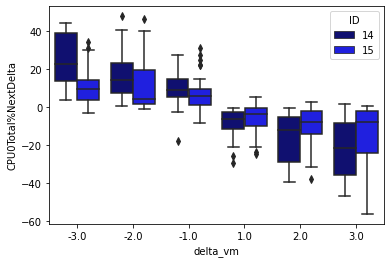

In [132]:
sns.boxplot(x='delta_vm', hue='ID', y='CPU0Total%NextDelta', data=pn)

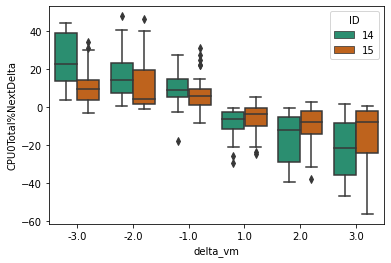

In [133]:
sns.boxplot(x='delta_vm', hue='ID', y='CPU0Total%NextDelta', data=pn, palette='Dark2')

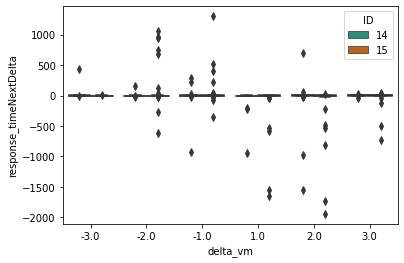

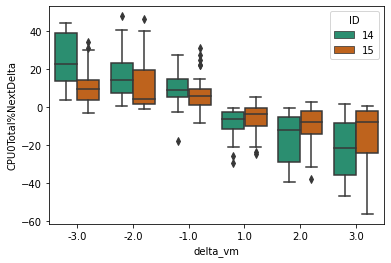

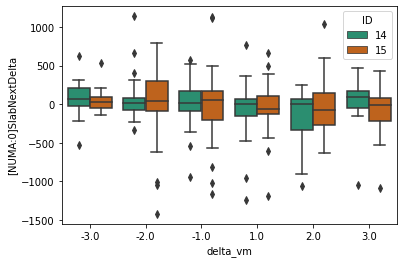

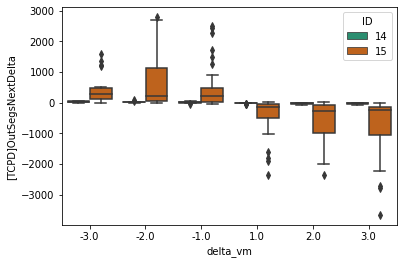

In [134]:
cns = list(pn.columns)[2:]

for columnnames in cns:
    sns.boxplot(x='delta_vm', hue='ID', y=columnnames, data=pn, palette='Dark2')
    plt.show()

In [135]:
cns = list(ff.columns)[2:]

cns = [ x for x in cns if 'Next' in x ]

cns

['response_time_p95NextDelta',
 'response_timeNextDelta',
 'worker_numberNextDelta',
 'request_rateNextDelta',
 'CPU0User%NextDelta',
 'CPU0Idle%NextDelta',
 'CPU0Total%NextDelta',
 '[DSK:sda]ReadsNextDelta',
 '[DSK:sda]RMergeNextDelta',
 '[DSK:sda]RKBytesNextDelta',
 '[DSK:sda]WaitRNextDelta',
 '[DSK:sda]WritesNextDelta',
 '[DSK:sda]WMergeNextDelta',
 '[DSK:sda]WKBytesNextDelta',
 '[DSK:sda]WaitWNextDelta',
 '[DSK:sda]RequestNextDelta',
 '[DSK:sda]QueLenNextDelta',
 '[DSK:sda]WaitNextDelta',
 '[DSK:sda]SvcTimNextDelta',
 '[DSK:sda]UtilNextDelta',
 '[NUMA:0]UsedNextDelta',
 '[NUMA:0]FreeNextDelta',
 '[NUMA:0]SlabNextDelta',
 '[NUMA:0]MappedNextDelta',
 '[NUMA:0]AnonNextDelta',
 '[NUMA:0]AnonHNextDelta',
 '[NUMA:0]InactiveNextDelta',
 '[NUMA:0]HitsNextDelta',
 '[TCPD]InReceivesNextDelta',
 '[TCPD]InDeliversNextDelta',
 '[TCPD]OutRequestsNextDelta',
 '[TCPD]InSegsNextDelta',
 '[TCPD]OutSegsNextDelta',
 'delta_vmNextDelta']

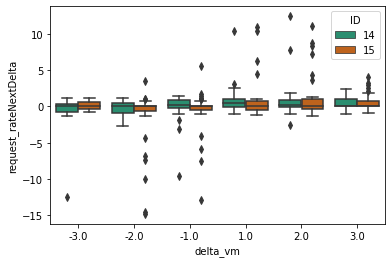

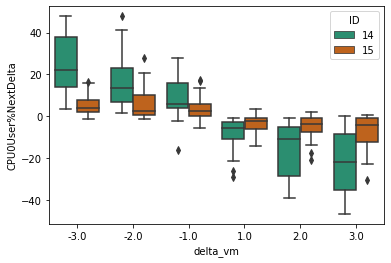

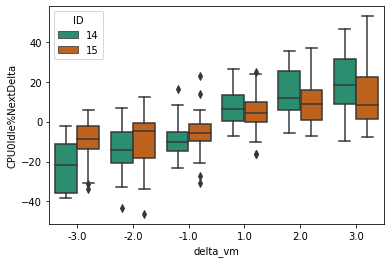

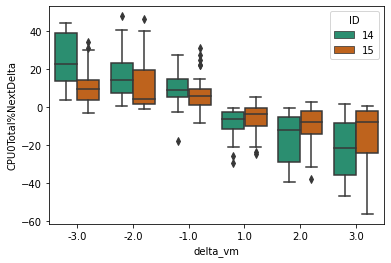

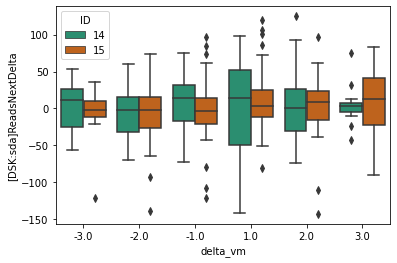

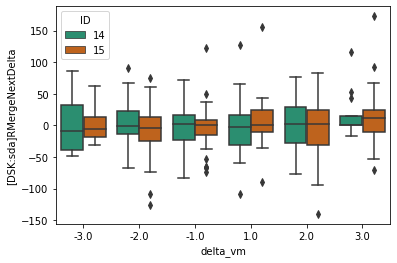

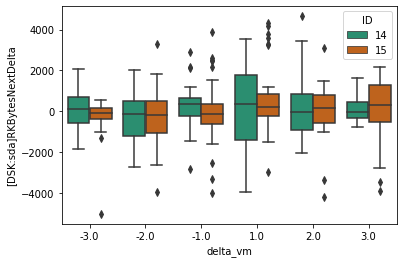

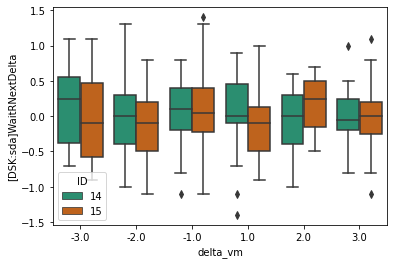

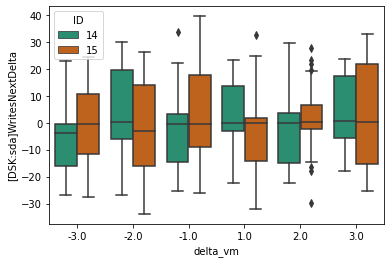

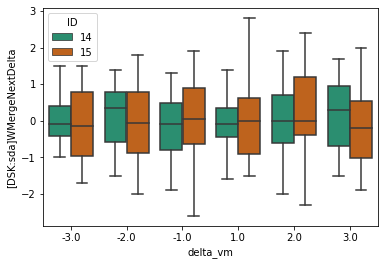

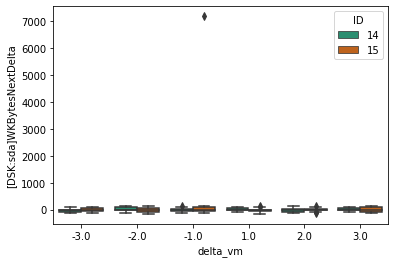

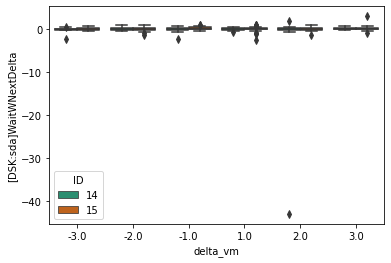

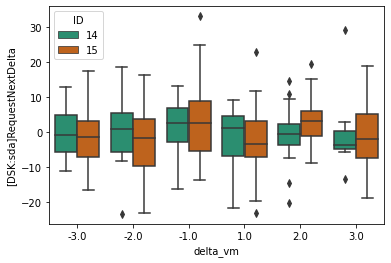

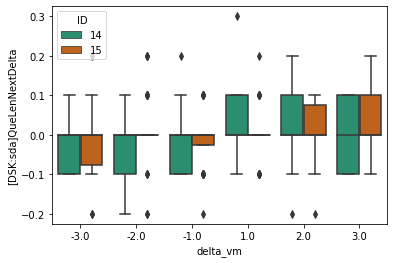

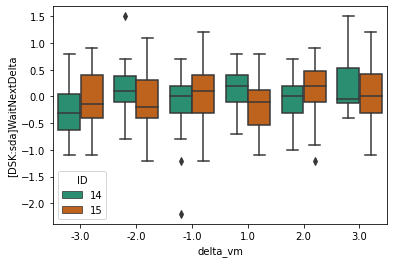

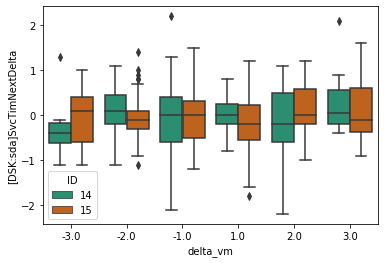

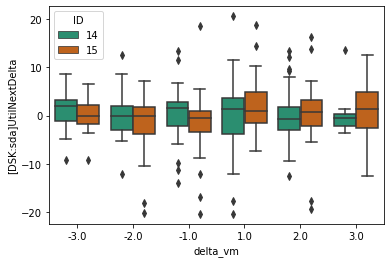

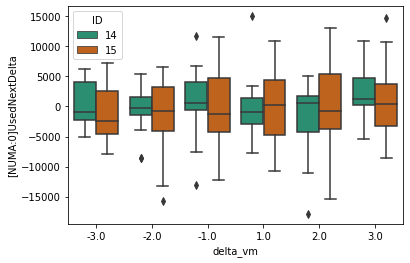

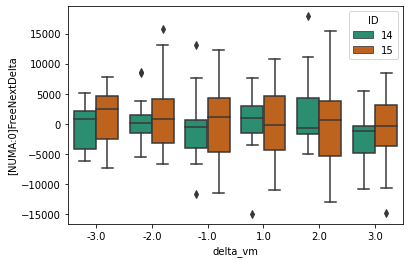

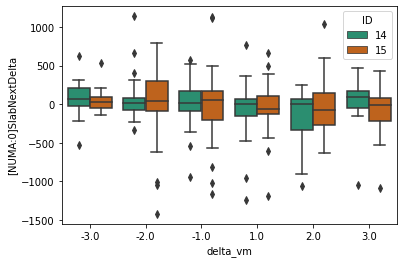

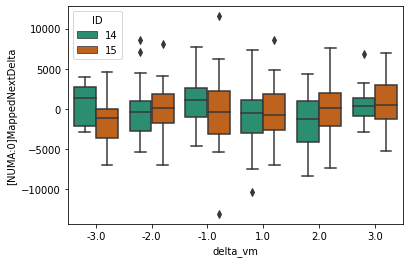

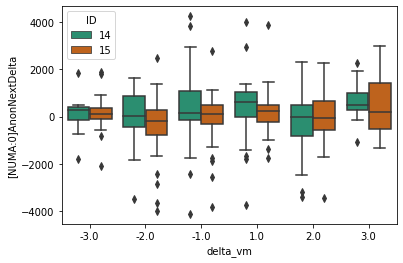

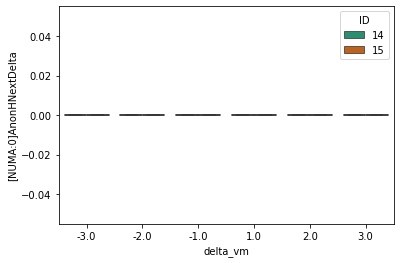

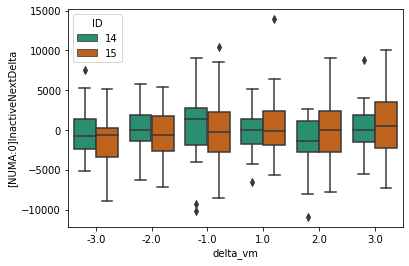

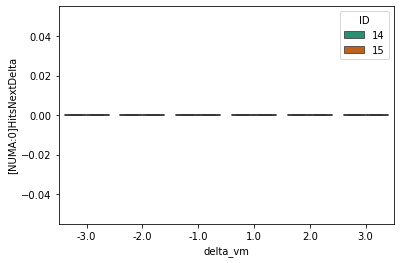

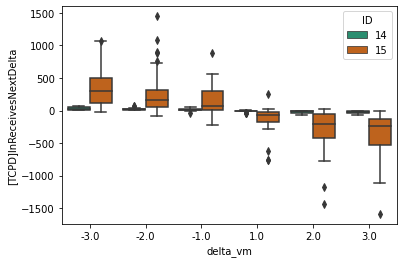

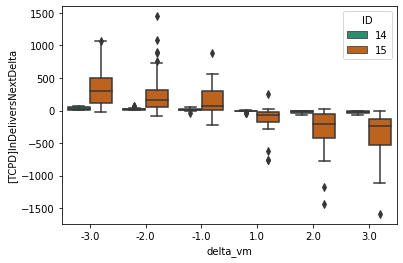

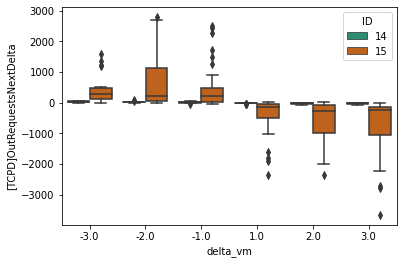

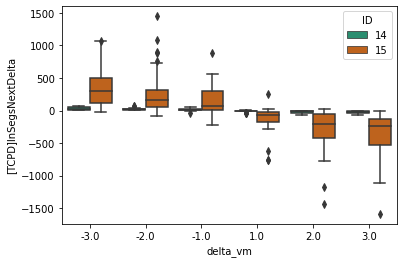

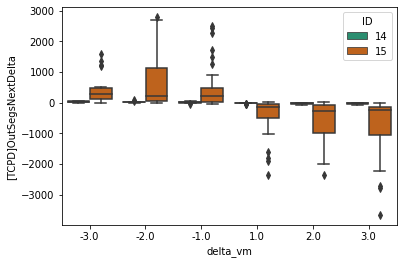

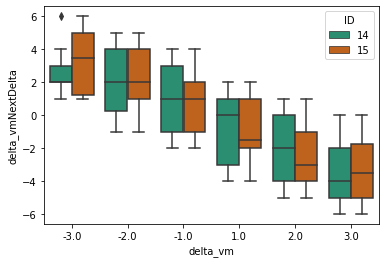

In [136]:
cns = list(ff.columns)[2:]

cns = [ x for x in cns if 'Next' in x ]

cns = cns[3:]

for columnnames in cns:
    sns.boxplot(x='delta_vm', hue='ID', y=columnnames, data=ff, palette='Dark2')
    plt.show()

In [137]:

# Tök jó sikerült megcsinálnom amit akartam.

# Ezeken a képeken majd később még elszarozhatok.

# Most annyi a lényeg, hogy tudom, hogy kell a különböző mérésekből származó adatokat
# úgy össze mergelni, hogy meg tudjam jeleníteni ezeket a táblázatokat


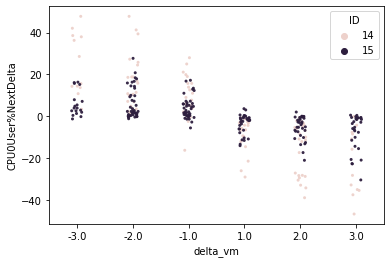

In [138]:
bplot = sns.stripplot(y='CPU0User%NextDelta',
                      x='delta_vm',
                      size=3,
                      data=ff,
                      jitter=True,
                      marker='o',
                      alpha=0.95,
                      hue='ID')

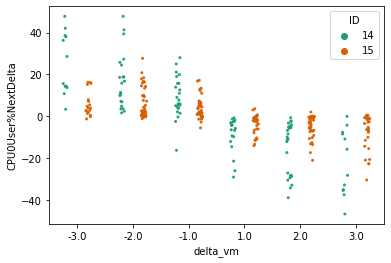

In [139]:
sns.stripplot(y='CPU0User%NextDelta',
              x='delta_vm',
              size=3,
              data=ff,
              jitter=True,
              dodge=True,
              marker='o',
              alpha=0.95,
              palette='Dark2',
              hue='ID')

In [140]:
# Oké eddig jó

for l in an.index.levels[0]:
    # lehet több változó alapján is aggregálni
    _ = an.groupby(['delta_vm', 'worker_number'])['CPU0Total%NextDelta'].mean()
    display(_)

delta_vm  worker_number
-3.0      4                27.460000
          5                30.060000
          6                21.566667
          7                 7.966667
          8                 6.666667
          9                 5.550000
-2.0      3                24.786667
          4                22.400000
          5                16.600000
          6                 6.100000
          7                 7.616667
          8                 2.312500
          9                 4.208333
-1.0      2                17.760000
          3                 9.675000
          4                 7.260000
          5                 8.233333
          6                 4.866667
          7                 2.412500
          8                 3.175000
          9                -0.450000
 1.0      1               -13.858333
          2               -21.100000
          3               -19.150000
          4                -7.200000
          5                -4.528571
          6   

delta_vm  worker_number
-3.0      4                27.460000
          5                30.060000
          6                21.566667
          7                 7.966667
          8                 6.666667
          9                 5.550000
-2.0      3                24.786667
          4                22.400000
          5                16.600000
          6                 6.100000
          7                 7.616667
          8                 2.312500
          9                 4.208333
-1.0      2                17.760000
          3                 9.675000
          4                 7.260000
          5                 8.233333
          6                 4.866667
          7                 2.412500
          8                 3.175000
          9                -0.450000
 1.0      1               -13.858333
          2               -21.100000
          3               -19.150000
          4                -7.200000
          5                -4.528571
          6   

In [141]:
# Oké eddig jó

# Ilyet is lehet (avg, min, max, std)

for l in an.index.levels[0]:
    aa = an.loc[l].groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()
    bb = an.loc[l].groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].min()
    cc = an.loc[l].groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].max()
    dd = an.loc[l].groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].std()
    aa.columns = ['CPU0Total%mean', 'CPU0User%mean']
    bb.columns = ['CPU0Total%min', 'CPU0User%min']
    cc.columns = ['CPU0Total%max', 'CPU0User%max']
    dd.columns = ['CPU0Total%std', 'CPU0User%std']

    print(l)
    _ = pd.concat([aa, bb, cc, dd], axis=1)
    display(_)
    

t14


CPU0Total%mean  CPU0User%mean  CPU0Total%min  CPU0User%min  \
delta_vm                                                               
-3.0           25.258333      25.291667            3.5           3.3   
-2.0           16.736364      16.700000            0.5           1.6   
-1.0            9.060000       8.920000          -18.2         -16.3   
 1.0           -8.778947      -8.736842          -29.3         -29.1   
 2.0          -15.760000     -15.612000          -39.3         -39.0   
 3.0          -21.816667     -21.958333          -47.1         -46.8   

          CPU0Total%max  CPU0User%max  CPU0Total%std  CPU0User%std  
delta_vm                                                            
-3.0               44.3          47.8      14.391062     14.836286  
-2.0               47.6          47.8      12.968296     13.116075  
-1.0               27.3          28.0       9.831836      9.601779  
 1.0               -0.5          -0.8       8.628157      8.445460  
 2.0               -0.7          -0.7      12.768875     12.492608  
 3.0                1.4          -0.1      15.961307     15.701850

t15


CPU0Total%mean  CPU0User%mean  CPU0Total%min  CPU0User%min  \
delta_vm                                                               
-3.0           11.233333       5.916667           -3.3          -1.3   
-2.0           11.011905       6.061905           -1.2          -1.2   
-1.0            6.857500       3.932500           -8.3          -5.6   
 1.0           -6.621875      -3.750000          -25.0         -14.1   
 2.0          -10.035294      -5.279412          -37.9         -21.1   
 3.0          -14.282143      -7.775000          -56.4         -30.5   

          CPU0Total%max  CPU0User%max  CPU0Total%std  CPU0User%std  
delta_vm                                                            
-3.0               34.1          16.3      11.855850      5.925344  
-2.0               46.2          27.7      12.801966      7.334414  
-1.0               30.9          17.2       8.685145      5.198293  
 1.0                5.4           3.6       8.258045      4.732319  
 2.0                2.7           2.0      10.052254      5.508274  
 3.0                0.2           0.5      15.761652      8.762404

In [142]:
for l in an.index.levels[0]:

    _ = an.loc[l].groupby(['delta_vm']).agg({
        'CPU0Total%NextDelta': ['mean', 'min', 'max', 'std'],
        'CPU0User%NextDelta': ['mean', 'min', 'max', 'std']
    })
    
    display(_)

CPU0Total%NextDelta                        CPU0User%NextDelta        \
                        mean   min   max        std               mean   min   
delta_vm                                                                       
-3.0               25.258333   3.5  44.3  14.391062          25.291667   3.3   
-2.0               16.736364   0.5  47.6  12.968296          16.700000   1.6   
-1.0                9.060000 -18.2  27.3   9.831836           8.920000 -16.3   
 1.0               -8.778947 -29.3  -0.5   8.628157          -8.736842 -29.1   
 2.0              -15.760000 -39.3  -0.7  12.768875         -15.612000 -39.0   
 3.0              -21.816667 -47.1   1.4  15.961307         -21.958333 -46.8   

                           
           max        std  
delta_vm                   
-3.0      47.8  14.836286  
-2.0      47.8  13.116075  
-1.0      28.0   9.601779  
 1.0      -0.8   8.445460  
 2.0      -0.7  12.492608  
 3.0      -0.1  15.701850

CPU0Total%NextDelta                        CPU0User%NextDelta        \
                        mean   min   max        std               mean   min   
delta_vm                                                                       
-3.0               11.233333  -3.3  34.1  11.855850           5.916667  -1.3   
-2.0               11.011905  -1.2  46.2  12.801966           6.061905  -1.2   
-1.0                6.857500  -8.3  30.9   8.685145           3.932500  -5.6   
 1.0               -6.621875 -25.0   5.4   8.258045          -3.750000 -14.1   
 2.0              -10.035294 -37.9   2.7  10.052254          -5.279412 -21.1   
 3.0              -14.282143 -56.4   0.2  15.761652          -7.775000 -30.5   

                          
           max       std  
delta_vm                  
-3.0      16.3  5.925344  
-2.0      27.7  7.334414  
-1.0      17.2  5.198293  
 1.0       3.6  4.732319  
 2.0       2.0  5.508274  
 3.0       0.5  8.762404

In [143]:
pd.options.display.float_format = "{:,.4f}".format

In [144]:
pd.options.display.float_format = "{}".format

In [145]:
pd.set_option('display.precision', 2)

In [146]:
_ = ff.groupby(['ID', 'delta_vm']).agg({
    'CPU0Total%NextDelta': ['mean', 'min', 'max', 'std'],
    'CPU0User%NextDelta': ['mean', 'min', 'max', 'std']
})

In [147]:
pd.reset_option('^display.', silent=True)

In [148]:
with pd.option_context('display.precision', 1):
    _.apply(lambda x: x.astype(int) if np.allclose(x, x.astype(int)) else x)
    display(_)


CPU0Total%NextDelta                   CPU0User%NextDelta        \
                           mean   min   max   std               mean   min   
ID delta_vm                                                                  
14 -3.0                    25.3   3.5  44.3  14.4               25.3   3.3   
   -2.0                    16.7   0.5  47.6  13.0               16.7   1.6   
   -1.0                     9.1 -18.2  27.3   9.8                8.9 -16.3   
    1.0                    -8.8 -29.3  -0.5   8.6               -8.7 -29.1   
    2.0                   -15.8 -39.3  -0.7  12.8              -15.6 -39.0   
    3.0                   -21.8 -47.1   1.4  16.0              -22.0 -46.8   
15 -3.0                    11.2  -3.3  34.1  11.9                5.9  -1.3   
   -2.0                    11.0  -1.2  46.2  12.8                6.1  -1.2   
   -1.0                     6.9  -8.3  30.9   8.7                3.9  -5.6   
    1.0                    -6.6 -25.0   5.4   8.3               -3.8 -14.1   
    2.0                   -10.0 -37.9   2.7  10.1               -5.3 -21.1   
    3.0                   -14.3 -56.4   0.2  15.8               -7.8 -30.5   

                            
                 max   std  
ID delta_vm                 
14 -3.0      4.8e+01  14.8  
   -2.0      4.8e+01  13.1  
   -1.0      2.8e+01   9.6  
    1.0     -8.0e-01   8.4  
    2.0     -7.0e-01  12.5  
    3.0     -1.0e-01  15.7  
15 -3.0      1.6e+01   5.9  
   -2.0      2.8e+01   7.3  
   -1.0      1.7e+01   5.2  
    1.0      3.6e+00   4.7  
    2.0      2.0e+00   5.5  
    3.0      5.0e-01   8.8

In [149]:

with pd.option_context('display.float_format', '{:,.4f}'.format):
    _.apply(lambda x: x.astype(int) if np.allclose(x, x.astype(int)) else x)
    display(_)


CPU0Total%NextDelta                          CPU0User%NextDelta  \
                           mean      min     max     std               mean   
ID delta_vm                                                                   
14 -3.0000              25.2583   3.5000 44.3000 14.3911            25.2917   
   -2.0000              16.7364   0.5000 47.6000 12.9683            16.7000   
   -1.0000               9.0600 -18.2000 27.3000  9.8318             8.9200   
   1.0000               -8.7789 -29.3000 -0.5000  8.6282            -8.7368   
   2.0000              -15.7600 -39.3000 -0.7000 12.7689           -15.6120   
   3.0000              -21.8167 -47.1000  1.4000 15.9613           -21.9583   
15 -3.0000              11.2333  -3.3000 34.1000 11.8558             5.9167   
   -2.0000              11.0119  -1.2000 46.2000 12.8020             6.0619   
   -1.0000               6.8575  -8.3000 30.9000  8.6851             3.9325   
   1.0000               -6.6219 -25.0000  5.4000  8.2580            -3.7500   
   2.0000              -10.0353 -37.9000  2.7000 10.0523            -5.2794   
   3.0000              -14.2821 -56.4000  0.2000 15.7617            -7.7750   

                                      
                 min     max     std  
ID delta_vm                           
14 -3.0000    3.3000 47.8000 14.8363  
   -2.0000    1.6000 47.8000 13.1161  
   -1.0000  -16.3000 28.0000  9.6018  
   1.0000   -29.1000 -0.8000  8.4455  
   2.0000   -39.0000 -0.7000 12.4926  
   3.0000   -46.8000 -0.1000 15.7019  
15 -3.0000   -1.3000 16.3000  5.9253  
   -2.0000   -1.2000 27.7000  7.3344  
   -1.0000   -5.6000 17.2000  5.1983  
   1.0000   -14.1000  3.6000  4.7323  
   2.0000   -21.1000  2.0000  5.5083  
   3.0000   -30.5000  0.5000  8.7624

In [150]:
#

#

# Itt tartok éppen

# Azon dolgozom, hogy a delta_metrika értékeket (delta_vm) fényében össze tudjam hasonlítani az egyes testek között

# Az egyes testek az egyes TestXX mappákban vannak

#

#

In [156]:
def cc(columnname: str):
    create_model_for_metric(columnname, short=True)
    # create_model_for_metric_paraszt(columnname)

In [157]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [158]:
mf.columns.difference(mf.select_dtypes('float64').columns)

Index(['actual_vm_number_is', 'time', 'worker_give_metrics', 'worker_number',
       'write_to_csv_time'],
      dtype='object')

In [159]:
cn = mf.columns.difference(mf.select_dtypes('object').columns)

# interact(create_model_for_metric, columnname=cn);

interact(cc, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('CPU0Idle%', 'CPU0Total%', 'CPU0User%', '[DS…

In [ ]:

# Az érdekelne még, hogy minden metrikán végig menve és megcsinálni a lr becslést,
# kiirtatni vele, hogy melyik lr_metrika becslés mennyire jó (r2, mse)

# A fenti és az alsó módszer ugyan azt az eredményt adja


In [162]:
get_all('CPU0Idle%', 't14')

{'f1.shape': ((114, 2), (114,)),
 'score_or': 0.6549923511941276,
 'coef_or': array([0.78514735, 1.02216771]),
 'intercept_or': 13.426181520872497,
 'slope_tp': 0.6549923511941278,
 'intercept_tp': 16.360928510609007,
 'r2': 0.6549923511941274,
 'r': 0.8093159773500875,
 'mse': 175.33026983289383}

In [161]:
get_all('CPU0Idle%', 't15')

{'f1.shape': ((194, 2), (194,)),
 'score_or': 0.6855208987373714,
 'coef_or': array([0.81839626, 0.98981005]),
 'intercept_or': 11.573752182180385,
 'slope_tp': 0.685520898737372,
 'intercept_tp': 16.38355066263534,
 'r2': 0.6855208987373717,
 'r': 0.8279618944959796,
 'mse': 154.1446689293648}

In [177]:

# végig megyek az össezs metrikán

columnnames = mf.columns
columnnames = columnnames[6:]
columnnames = columnnames[:-4]

columnnames = [i for i in columnnames if '[NUMA:0]AnonH' not in i]
print(columnnames)

['request_rate', 'CPU0User%', 'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs', '[TCPD]OutSegs']


In [203]:
rs = []
ns = ['Columnname']
for columnname in columnnames:
    # print(columnname)
    r = []
    r.append(columnname)
    for l in mf.index.levels[0]:
        _ = get_all(columnname, l)
        # print(l, _['r2'])
        r.append(_['r2'])
    rs.append(r)

for _ in mf.index.levels[0]:
    ns.append(_ + '(r2)')

fak = pd.DataFrame(rs, columns=ns)

fak = fak.dropna()

/tmp/ipykernel_968188/1447704427.py:8: RankWarning: Polyfit may be poorly conditioned
  _ = get_all(columnname, l)
/tmp/ipykernel_968188/2995407353.py:84: RuntimeWarning: invalid value encountered in double_scalars
  correlation_coef = numerator / denominator
/tmp/ipykernel_968188/1447704427.py:8: RankWarning: Polyfit may be poorly conditioned
  _ = get_all(columnname, l)
/tmp/ipykernel_968188/2995407353.py:84: RuntimeWarning: invalid value encountered in double_scalars
  correlation_coef = numerator / denominator


In [210]:
for _ in fak.columns[1:]:
    fak[_] = fak[_].apply(lambda x: float("{:.2f}".format(x)))

In [232]:
def color(val):
    if val <= 0.6:
        color = 'yellow'
    elif val <= 0.8:
        color = 'orange'
    elif val > 0.8:
        color = 'green'
    else:
        color = 'white'
    return 'background-color: %s' % color

fak.style.applymap(color, subset=['t14(r2)'])
fak.style.applymap(color, subset=['t15(r2)'])

with pd.option_context('display.precision', 2):
    _ = fak.style.applymap(color, subset=['t14(r2)','t15(r2)'])
    display(_)

In [233]:

# Nagyon jó

# Fenti táblázat fáradozásom egyfajta végeredménye.

# Ez alapján látható, hogy melyik az a változó az adott experimentben amit a lineráris regresszióval sikerült
# jól megbecsülni.

# De az is látszik, hogy melyik az amelyiket nem - és ezért nem nagyon érdemes belevenni az elemézésbe és a
# Response Time becslésébe, mert maga a változó nem jól becsülhető a linreg segítségével.


# Oké tehát :

# Anon, Slab, TPC--k, CPU0Total%, RKbytes, Utils

(114, 2) (114,)
score  = 0.9924481356448239
coef   = [0.9959851  0.99606961]
intcpt = 3158.8301139266696

slope 0.99 int 5611.62
r2 0.99
r  1.00
mse 2061259.49


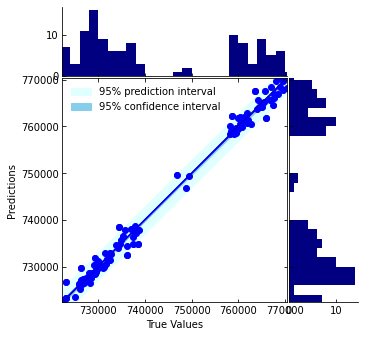

(194, 2) (194,)
score  = 0.9917931245169884
coef   = [0.98970899 0.99016745]
intcpt = 7776.8293187124655

slope 0.99 int 6111.73
r2 0.99
r  1.00
mse 1238552.43


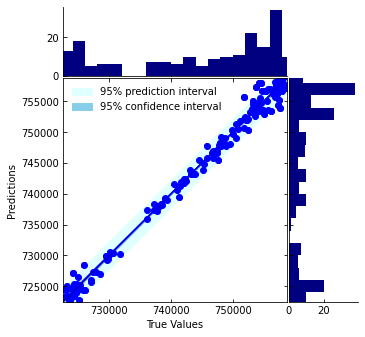

In [236]:
create_model_for_metric('[NUMA:0]Anon', short=True, binwidth=2000.0)

In [ ]:

# Csakhogy innentől az van, hogy vége az ANOVA elemzésnek - vagyis annak a részének amiből
# azt próbáltam kiszűrni, hogy melyik testben melyik metrikák jók arra, hogy
# segítségükkel az RT-t becsüljem, és melyik metriák azok amelyeknek,
# jó az LR becslése (ez utóbbi látható a legutolsó táblázatban)

# ------------------------------------------------------------

# Ez a rész már a konkrét neurális háló tanítás.

# Ezeket mivel minden teszt-ben külön neurális hálót tanítok
# ezt már a tesztekhez tartozó mappákban végzem el

# ------------------------------------------------------------

In [240]:
# Fentiek alapján a következőek tűnnek jónak
g = ['[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped', '[NUMA:0]Slab']

g = ['[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']

# Korábban peig azt láttam, hogy ezek vannak jó linearitásban a delta_vm-el
g = ['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs'] + g

In [311]:
# Csak kiviből kipróbálom, hogy milyen érkeket adna az ő linreg beállításaikkal (nem tom melyik, melyik metric)

bvalues = [[1,0,0],
           [0.9448,0.1072,3.0954],
           [0.8954,0.3220,42.3307],
           [1.1008,0.4017,-20.2569],
           [1.0589,0.5713,1.5306],
           [0.6142,0.1733,26.5175],
           [0.9222,0.2059,1.1572],
           [0.7489,0.2851,18.4977]]

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

metrics = [90, 90, 90, 90, 90, 90]
w = 3
k = 1

m = 1

_cpu = np.dot(bvalues[m],[(metrics[m]*w)/(w+k),(metrics[m]*k)/(w+k),1])

print(_cpu)

# Mivel nem tudom, hogy melyik együtthatótk tartoznak a cpu-hoz ezért nem merem biztosan kijelenteni,
# de úgy tűnik, hogy náluk ha egy VM-t hozzáadok akkor csökken a CPU usage érték és nem nő.

# Ennek lehet az az oka is, hogy a Fibonacci CPU REST API-n tanítottam

69.2814


In [241]:

# Az a meglátásom, hogy vannak olyan metrikák amelyeknek a lineáris regressziós becslése katasztrófálisan szar.

# Ezért ezeket a változókat még véletlenül sem szabad bevennem a Neurális háló modellbe


In [242]:

# Csak úgy mondom, hogy gyárilag a Request Rate értéket is becsülni kell a linreg modellel

# Ennek az az oka, hogy mivel elosztott terhelés van, valóban előforudhat és elő is fordul,
# hogy ha egy új VM-t becsatolok a rendszerbe akkor az adott gépre kevesebb bejövő kérés
# fog jutni.


In [243]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [246]:

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH']

input_variables = ['CPU1Idle%', 
                   'CPU1Total%', 
                   '[DSK:sda]Reads', 
                   '[DSK:sda]RMerge', 
                   '[DSK:sda]RKBytes', 
                   '[DSK:sda]WaitR', 
                   '[DSK:sda]Writes', 
                   '[DSK:sda]WMerge', 
                   '[DSK:sda]WaitW', 
                   '[DSK:sda]SvcTim']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WaitW',
                   '[NUMA:0]AnonH']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]WaitR',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WMerge',
                   '[DSK:sda]WKBytes',
                   '[DSK:sda]WaitW',
                   '[DSK:sda]Request',
                   '[DSK:sda]QueLen',
                   '[DSK:sda]Wait',
                   '[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   '[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   '[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   #'[DSK:sda]WaitR',
                   #'[DSK:sda]Writes',
                   #'[DSK:sda]WMerge',
                   #'[DSK:sda]WKBytes',
                   #'[DSK:sda]WaitW',
                   #'[DSK:sda]Request',
                   #'[DSK:sda]QueLen',
                   #'[DSK:sda]Wait',
                   #'[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   #'[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   #'[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   #'[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Csak a jó linregesek (17.8%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Fent -> még akkor is ha ez a model rosszabb becslést ad az actionok után sokkal jobb


# Amik a korábbi elemzések alapján szóba jöhet
input_variables = g


loc = 't14'


train_features = mf.loc[loc][input_variables]

# train_labels = mf[['response_time_p95']]

train_labels = mf.loc[loc][['response_time']]


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


[[   46.09 88445.81    48.63   103.67  3197.71 74804.25 38409.25]]
First example: [[    9.  89359.6     7.3    13.1   306.9 66139.2 61808. ]]
Normalized   : [[-1.41  0.78 -1.09 -1.45 -1.28 -1.02  3.48]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 7)                15        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 30)                240       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 736
Trainable params: 721
Non-train

In [247]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

In [273]:

import tensorflow_addons as tfa

import tqdm

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar(leave_epoch_progress=False,
                                              show_epoch_progress=False)



Training:   0%|           0/15 ETA: ?s,  ?epochs/s

CPU times: user 797 ms, sys: 55.7 ms, total: 853 ms
Wall time: 1.4 s


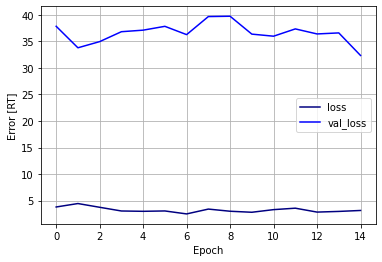

In [274]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history)

In [275]:
predicted_labels = first_model.predict(train_features)

5/5 [==============================] - 0s 3ms/step


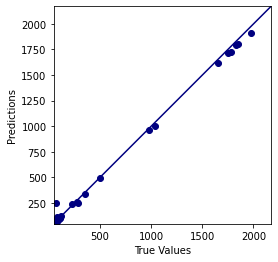

In [276]:
plot_true_vs_pred(train_labels.values, predicted_labels)

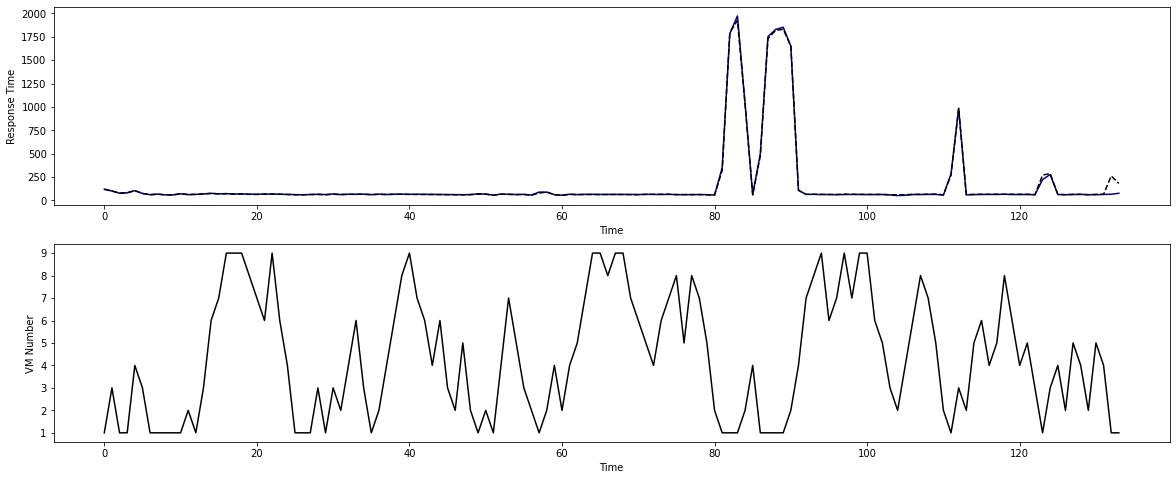

In [254]:
def plot_timeseries(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(mf.loc[loc]['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(mf.loc[loc]['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

plot_timeseries(train_labels.values, predicted_labels)

In [323]:
# Nem vagyok megelégedve az eredménnyel, mert:

# - a neurális háló nagyon érzékeny mindenre így nehéz összehasonlítanom az eredményeket.

# - nem sikerült még kiválasztanom a jó bemeneti változókat

# Hogy tovább tudjak lépni, most ezektől eltenkintek és elkészítem az a sub-routint ami kiszámolja a becslült
# válaszidőket az egyes fel-, leskálázási értékekehze.

In [255]:
print(input_variables)

['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs', '[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']


In [278]:
# mindegyikhez elkészíteni hogy mi lenne a fel leskálázás utáni értéke

A = [i for i in range(-7, 8, 1)]

print(A)

# -2.
# inicalizálni egy üres dictianary-t a dict(action, predicted_response_time) pároknak
r = []
al = []
rl = []

# -1.
# kiválasztani, hogy milyen értéket mérek aktuális metrikákként
# ideiglenesen az mf utolsó értékei lesznek a bemenők

__N = 84

__current_response_time = mf.loc[loc]['response_time_p95'].values[__N]
__last_metrics = mf.loc[loc][input_variables].values[__N]
__w = mf.loc[loc]['worker_number'].values[__N]

print('-----------------------------------------')
print('__last_metrics -> vagyis a current values')
with np.printoptions(precision=2, suppress=True):
    print(__last_metrics)
print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
print(colored('__w -> worker_number \t' + str(__w), 'red'))

print('-----------------------------------------')

print(input_variables)
print('-----------------------------------------')

for a in A:
    
    # Ez kell, hogy a VM szám (w) ne legyen 0
    if __w + a != 0:
    
        # 0.
        # inicializálni egy üres tömböt az input_variable változónak
        _new_train_features = np.zeros((1, mf.loc[loc][input_variables].shape[1]))


        # 1.
        # minden metrikára kiszámolni
        for i, metric in enumerate(input_variables):
            # print(i, metric)
            if metric != 'worker_number':

                # 2.
                # megcsinálni a linreg modelt az adott metrikára (tanítás)
                __metric_term, __metric_next = create_term_for_metric(metric)
                __metric_term = __metric_term.loc[loc]
                __metric_next = __metric_next.loc[loc]
                __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
                
                # 3.
                # elmenetni az adott modelt (amit nem használok sehol)
                # _ = joblib.dump(__lr_model, './lr/lr_' + metric + '.joblib', compress=9)
                
                # 3.
                # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                # print('---a metrica értékének becsése (value, w, k alapján ---')
                # print(__metric_term)
                # print(metric)
                # print(a)
                # print('------------------')
                __pred_metric = __lr_model.predict(__metric_term)
                
                # 4.
                # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                _new_train_features[0, i] = __pred_metric
                # print(_new_train_features)
            
                
        # 5.
        # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
        with np.printoptions(precision=2, suppress=True):
            print(_new_train_features)
        
        # 6.
        # a neurális háló model segítségével megbecsülöm a válaszidőt
        
        __predicted_response_time = first_model.predict(_new_train_features, verbose = 0)
        
        with np.printoptions(precision=2, suppress=True):
            print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')


[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
-----------------------------------------
__last_metrics -> vagyis a current values
[   96.5 88154.8   138.4    87.5  2315.9 74253.6 35585.2]
__current_rt -> 	2665.0233500000004
__w -> worker_number 	2
-----------------------------------------
['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs', '[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']
-----------------------------------------
[[   32.35 88003.45    23.36    96.72  2634.46 74350.92 35204.9 ]]
action =  -7  --> rt -->  [[49.94]] 

[[   28.54 87994.59    15.95    96.86  2638.86 74352.02 35166.79]]
action =  -6  --> rt -->  [[55.34]] 

[[   22.19 87979.83     3.62    97.09  2646.21 74353.85 35103.28]]
action =  -5  --> rt -->  [[55.59]] 

[[    9.49 87950.3    -21.06    97.55  2660.9  74357.52 34976.25]]
action =  -4  --> rt -->  [[58.48]] 

[[  -28.59 87861.71   -95.08    98.93  2704.97 74368.52 34595.17]]
action =  -3  --> rt -->  [[59.46]] 

[[  123.75 88216

In [277]:
from sklearn.linear_model import LinearRegression

def create_term_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

def create_term_for_prediction(value: float, w: int, k: int):
    
    __metric_term1 = value * w/(w+k)
    __metric_term2 = value * k/(w+k)
    
    __metric_term = np.array([[__metric_term1, __metric_term2]])
    
    return __metric_term

def calc_pred_for_metric(__metric_term, __metric_next):

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    return rr
    
    

In [ ]:
# Az egy jó jel, hogyha nem változtatná a vm-ek számát vagyis a k=0, akkor a linreg becsés alapján
# adott új metrika érétkek
# és az ezek alapján adott becslése a válaszidőnek
# nagyon közel áll az éppen mért válaszidő értékéhez,
# ez egy nagyon jó jel, jele annak, hogy a két model jól működik

In [328]:
# A következő feladat

# Ha jól látom ez a Train10 könyvtár

# Tehát ebbe a könyvtárba megírni azt, hogy a feltanított modell alapján skálázzon,.

# És fontos az is, hogy ugyan itt legyen letárolva a terhelést végző jmx profil is,
# hogy ugyan az alapján tudjam terhelni ami alapján tanítottam.
# (egyezzenek a végpontok, stb.)

In [329]:
# Teendő 1

# Kiexportálni az itt feltanított model.

# Keras

first_model.save(os.getcwd())

# first_model.save('model.h5')


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train14/assets


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train14/assets


In [330]:

model = keras.models.load_model(os.getcwd())

# Let's check:
np.testing.assert_allclose(
    first_model.predict(_new_train_features), model.predict(_new_train_features)
)


1/1 [==============================] - 0s 86ms/step


In [331]:
# https://www.tensorflow.org/tutorials/keras/regression

In [383]:

def moric(__n, debug=False):
    'Az adatsorban minden elemre kiszámolja, hogy mi lett volna a válaszidő különböz k-mellett'
    
    results = []
    results_dict = []

    A = [i for i in range(-9, 10, 1)]

    # n-edik elem lesz kiválasztva a 'mf' dataframeből
    __N = __n

    __current_response_time = mf['response_time_p95'].values[__N]
    __last_metrics = mf[input_variables].values[__N]
    __w = mf['worker_number'].values[__N]
    
    if debug == True:
        print('RT = ', __current_response_time)
        print('w  = ', __w)
        with np.printoptions(precision=2, suppress=True):
            print(__last_metrics)

    for a in A:

        # Ez kell, hogy a VM szám (w) ne legyen 0
        if __w + a != 0:

            # 0.
            # inicializálni egy üres tömböt az input_variable változónak
            _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

            # 1.
            # minden metrikára kiszámolni
            for i, metric in enumerate(input_variables):
                # print(i, metric)
                if metric != 'worker_number':

                    # 2.
                    # megcsinálni a linreg modelt az adott metrikára (tanítás)
                    __metric_term, __metric_next = create_term_for_metric(metric)
                    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)

                    # 3.
                    # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                    __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                    __pred_metric = __lr_model.predict(__metric_term)

                    # 4.
                    # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                    _new_train_features[0, i] = __pred_metric
                    # print(_new_train_features)

            # 5.
            # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
            if debug == True:
                with np.printoptions(precision=2, suppress=True):
                    print(_new_train_features)

            # 6.
            # a neurális háló model segítségével megbecsülöm a válaszidőt
            _ = time.time()
            __predicted_response_time = first_model.predict(_new_train_features, verbose = 0, batch_size=10, use_multiprocessing=True)
            # print(time.time()-_)
            
            # X.
            # megpróbálom felgyorsítani, hogy a numpy számoja a pred válaszidőt
            # W = first_model.get_weights()
            # __px = predict(_new_train_features)
            # print(__px, __predicted_response_time.flatten()[0])
            
            results_dict.append({'action': a, 'prt': __predicted_response_time.flatten()[0]})
            results.append(__predicted_response_time.flatten()[0])
            
    return results


In [372]:
len(mf)

134

In [348]:
a_prts = []
# for i in mf.shape[0]:
for i in track(range(len(mf))):
    _ = moric(i)
    a_prts.append(_)
    

Output()

2023-05-10 16:57:03.004009: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 16:57:43.415291: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 16:59:45.609294: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


In [357]:
len(a_prts)

134

In [358]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

a

{18}

In [362]:
# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)


a = np.array(a_prts[30:50])
print(a.shape)


(134, 18)
(20, 18)


In [363]:
# Ha csak bizonyos típusú actionoket akarok (pl. 0, 1, .., 5)

a = a[:,6:]
print(a.shape)

(20, 12)


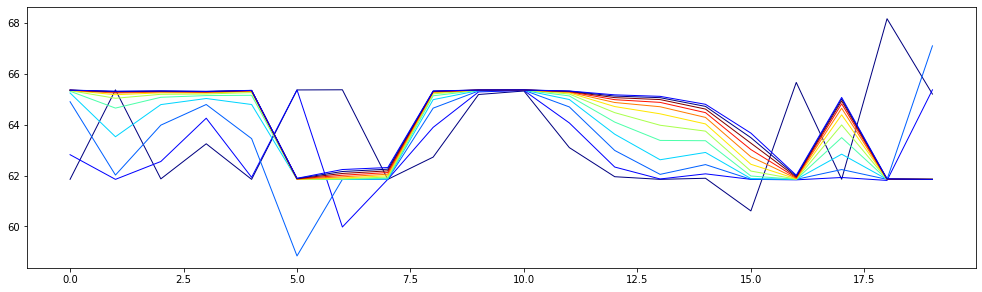

In [364]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 1
#mpl.rcParams['lines.linestyle'] = '-'
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

plt.figure(figsize=(17, 4.8))
plt.plot(a)
plt.show()

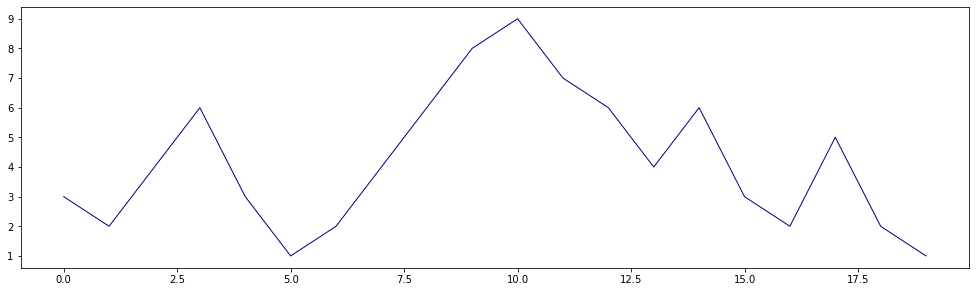

In [388]:
plt.figure(figsize=(17, 4.8))
plt.plot(mf['worker_number'].values[30:50])
plt.show()

In [384]:

# Amit egyszerűen nehezen tudok a mai agyammal felfogni, hogy van az, hogy vannak olyan pontok az idősorban
# amikor tök mindegy hány új vm-et adnék hozzá azt mondja hogy mindíg ugyan az lenne a várható válaszidő.

# Hogy a pékbe van ez?
# Mi miatt van ez így?
# A linreg nem teszi adott helyen a megfellő helyre az új metrika értéket?
# Vagy a neurális háló?

# A fenti est kitűnő példa erre.

# Például a 40-ik eset pont ilyen.

# ---> 

# Lehet, hogy ez olyan helyeken fordul elő, ahol a current worker number maximumon van.

moric(40)

moric(40, debug=True)

RT =  84.772
w  =  9
[   22.7 89664.4    16.2   158.3  4139.4 82171.2 37952. ]
[[   97.08 90303.59    88.15   127.74  3450.36 81052.05 40970.89]]
[[   56.76 89898.14    49.16   138.98  3804.83 81106.83 39141.96]]
[[   43.32 89762.98    36.17   142.72  3922.98 81125.09 38532.31]]
[[   36.61 89695.41    29.67   144.6   3982.06 81134.22 38227.49]]
[[   32.57 89654.86    25.77   145.72  4017.51 81139.69 38044.6 ]]
[[   29.89 89627.83    23.17   146.47  4041.14 81143.35 37922.67]]
[[   27.97 89608.52    21.31   147.    4058.02 81145.95 37835.58]]
[[   26.53 89594.04    19.92   147.4   4070.68 81147.91 37770.26]]
[[   25.41 89582.78    18.84   147.72  4080.52 81149.43 37719.45]]
[[   24.51 89573.77    17.97   147.97  4088.4  81150.65 37678.81]]
[[   23.78 89566.4     17.26   148.17  4094.84 81151.65 37645.56]]
[[   23.17 89560.26    16.67   148.34  4100.22 81152.48 37617.85]]
[[   22.65 89555.06    16.17   148.48  4104.76 81153.18 37594.4 ]]
[[   22.21 89550.6     15.74   148.61  4108.66 811

[85.76027,
 61.860844,
 62.080505,
 63.90139,
 65.03315,
 65.268074,
 65.328476,
 65.3494,
 65.35842,
 65.36295,
 65.36551,
 65.36708,
 65.36812,
 65.36885,
 65.369385,
 65.3698,
 65.37012,
 65.37038]